**# Исследование**
В этом файле мы изучаем данные, выдвигаем гипотезы по метрикам, которые сможем использовать для эффективного обучения нейросети.

Для обучения нейронной сети нам необходимо выбрать не коррелирующие данные. Что это нам даст?

- Избегание переобучения (overfitting): Если данные сильно коррелируют между собой, модель может выучить эти зависимости вместо обобщения их на новые данные. Это может привести к переобучению, когда модель хорошо работает на обучающих данных, но плохо справляется с новыми, ранее не виденными данными.

- Обобщение модели: Если модель обучается на разнообразных данных, она лучше обобщит закономерности и сможет более точно предсказывать на новых данных. Разнообразные данные помогают модели лучше понять вариативность и различия в данных.

- Повышение устойчивости: Разнообразные данные делают модель более устойчивой к изменениям в данных. Если модель обучена на некоррелирующих данных, она, скорее всего, лучше справится с изменениями в данных и будет более обобщающей.

- Предотвращение смещения данных: Когда данные сильно коррелируют, модель может быть подвержена смещению (bias) в сторону представителей одной группы данных. Это может привести к тому, что модель будет менее точной при работе с данными других групп.

Однако, важно учитывать, что полное отсутствие корреляции между данными может быть трудно достичь. 
В общем, разнообразие в данных остается ключевым принципом для успешного обучения нейронных сетей.

Установим некоторые нужные библиотеки.

In [198]:
pip install pandas scipy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [199]:
import os
import sys
from datetime import datetime
import pandas as pd
import numpy as np
import math

Загрузим данные по Сбербанку. И начнем с метрик Super Candles - tradestats.

In [200]:
symbol = 'SBER'  # Тикер, который будем исследовать

# metrics = ('tradestats', 'orderstats', 'obstats')  # Метрики
metric = 'tradestats'  # будем использовать некоторые метрики из tradestats, у них только один ТФ = M5

file_name = os.path.join('csv', f'{symbol}_{metric}.csv')

# df = pd.read_csv(file_name, sep=',', parse_dates=['datetime'], date_format='%Y-%m-%d %H:%M', index_col='datetime')  # Считываем файл в DataFrame
# df = pd.read_csv(file_name, sep=',', parse_dates=['datetime'], date_format='%Y-%m-%d %H:%M')  # Считываем файл в DataFrame
# df = pd.read_csv(file_name)  # Считываем файл в DataFrame
df = pd.read_csv(file_name, sep=',', parse_dates=['datetime'])  # Считываем файл в DataFrame

# print(df.dtypes)
# print()
df

datetime  pr_open  pr_high  pr_low  pr_close  pr_change  \
0      2020-01-03 10:00:00   255.97   256.97  255.85    256.77     0.3125   
1      2020-01-03 10:05:00   256.77   256.90  256.30    256.70    -0.0273   
2      2020-01-03 10:10:00   256.68   256.75  256.03    256.12    -0.2182   
3      2020-01-03 10:15:00   256.19   256.42  255.83    255.89    -0.1171   
4      2020-01-03 10:20:00   255.89   256.31  255.88    256.13     0.0938   
...                    ...      ...      ...     ...       ...        ...   
100854 2023-12-05 18:15:00   277.32   277.45  277.30    277.39     0.0252   
100855 2023-12-05 18:20:00   277.39   277.69  277.26    277.27    -0.0433   
100856 2023-12-05 18:25:00   277.27   277.43  277.15    277.24    -0.0108   
100857 2023-12-05 18:30:00   277.25   277.36  277.16    277.18    -0.0252   
100858 2023-12-05 18:35:00   277.18   277.18  276.86    276.86    -0.1154   

        trades     vol          val  pr_std  disb  pr_vwap  trades_b  vol_b  \
0         1935  116141  297831085.0  0.0001  0.15   256.44      1091  66691   
1         1070   91089  233774043.0  0.0001  0.17   256.64       607  53495   
2          664   44029  112878288.0  0.0001 -0.30   256.37       270  15308   
3          821   47233  120941565.0  0.0001 -0.14   256.05       348  20341   
4          501   21910   56115025.0  0.0001  0.26   256.12       253  13806   
...        ...     ...          ...     ...   ...      ...       ...    ...   
100854     451   24935   69159361.0  0.0001  0.07   277.36       244  13380   
100855    1075   74770  207505569.0  0.0000 -0.14   277.53       505  32324   
100856     456   25381   70372954.0  0.0001 -0.02   277.27       232  12486   
100857     374   16819   46629035.0  0.0001 -0.38   277.24       172   5239   
100858     828   38953  107915220.0  0.0001  0.04   277.04       421  20208   

              val_b  pr_vwap_b  trades_s  vol_s        val_s  pr_vwap_s  
0       171039244.0     256.47       844  49450  126791841.0     256.40  
1       137298083.0     256.66       463  37594   96475959.0     256.63  
2        39244498.0     256.37       394  28721   73633790.0     256.38  
3        52097439.0     256.12       473  26892   68844126.0     256.00  
4        35361727.0     256.13       248   8104   20753298.0     256.09  
...             ...        ...       ...    ...          ...        ...  
100854   37111081.0     277.36       207  11555   32048280.0     277.35  
100855   89709850.0     277.53       570  42446  117795719.0     277.52  
100856   34618698.0     277.26       224  12895   35754256.0     277.27  
100857   14524194.0     277.23       202  11580   32104841.0     277.24  
100858   55983007.0     277.03       407  18745   51932212.0     277.05  

[100859 rows x 20 columns]

Построим коррелограмму для графического представления коэффициентов корреляции между различными метриками в наборе данных. Корреляция измеряет степень линейной зависимости между двумя метриками. Коррелограмма позволяет визуально оценить, есть ли какие-то закономерности в отношениях между метриками.

Коэффициент корреляции между двумя метриками варьируется от -1 до 1. Значение близкое к 1 указывает на положительную линейную зависимость, значение близкое к -1 — на отрицательную линейную зависимость, а значение около 0 — на отсутствие линейной зависимости.

Цветовая шкала часто используется для визуализации степени корреляции. Например, более яркий цвет может обозначать более сильную корреляцию, а более тусклый — более слабую или отсутствие корреляции.

Коррелограммы могут быть полезны для выявления паттернов и взаимосвязей в данных, что помогает в понимании структуры данных и выборе соответствующих методов анализа.

Анализируем метрики из tradestats с помощью коррелограммы.

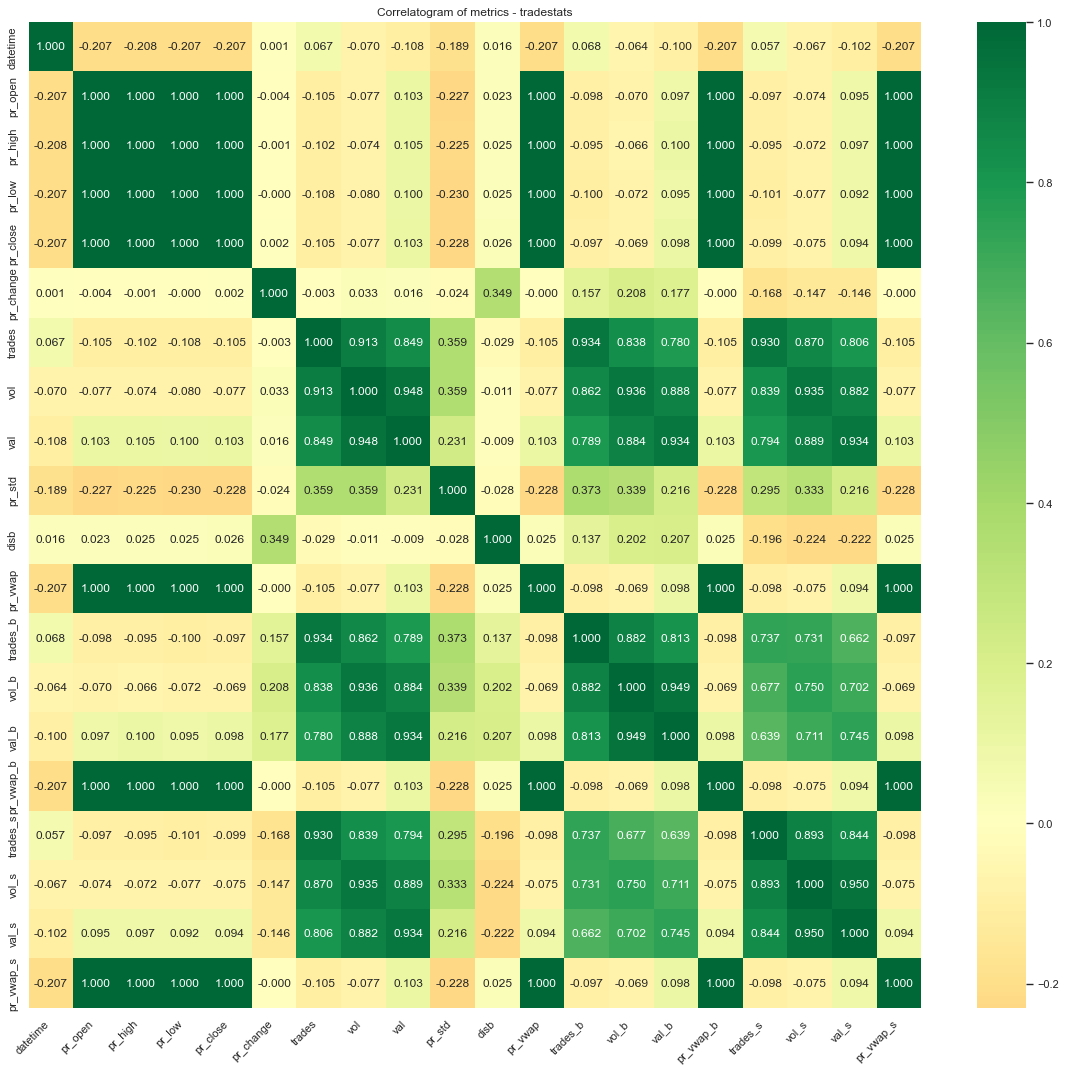

In [201]:
# строим коррелограмму по tradestats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=0.9) # font size 2

df_1 = df.copy()
df_filtered = df_1.copy()
# df_filtered = df.drop('datetime', axis=1)
plt.figure(figsize=(18, 16), dpi=80)
sns.heatmap(df_filtered.corr(), xticklabels=df_filtered.corr().columns, yticklabels=df_filtered.corr().columns, cmap='RdYlGn', center=0, annot=True, fmt=".3f")
plt.title(f'Correlatogram of metrics - {metric}')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

* Сильная положительная корреляция между 'pr_open', 'pr_high', 'pr_low', 'pr_close' И 'pr_vwap', 'pr_vwap_b', 'pr_vwap_s' означает, что цены OHLC меняются так же как и средневзвешенные цены покупки/продажи

* Сильная положительная корреляция между 'trades' и 'vol', 'val', 'trades_b', 'vol_b', 'val_b', 'trades_s', 'vol_s', 'val_s' означает, что кол-во сделок сильно влияет на объем в лотах/рублях, кол-во сделок на покупку/продажу и объем покупок/продаж в лотах/рублях

* Положительная корреляция между 'pr_change' и 'disb' означает, что на изменение цены за период есть некое влияние соотношения объема покупок и продаж

Т.к. наша задача - с помощью нейросети дать рекомендательную оценку на будущее изменение цены закрытия по тикеру, то обратим внимание на взаимосвязь 'pr_close' с другими метриками:

* Малая корреляция есть между 'pr_close' и 'pr_change', выбираем этот параметр для обучения нейросети

* Малая корреляция есть между 'pr_close' и  'trades', 'vol', 'val', 'trades_b', 'vol_b', 'val_b', 'trades_s', 'vol_s', 'val_s', но эти метрики между собой имеют сильную положительную корреляцию, поэтому из такого списка можно выбрать один параметр, но мы не будем)) 

Добавляем магии, к столбцам:
'pr_open', 'pr_high', 'pr_low', 'pr_close' И 'pr_vwap', 'pr_vwap_b', 'pr_vwap_s'
'trades' и 'vol', 'val', 'trades_b', 'vol_b', 'val_b', 'trades_s', 'vol_s', 'val_s'
делаем их дельтой с предыдущим значением 
и вновь строим коррелограмму.
P.S. Эту коррелограмму будем использовать позже.

In [202]:
df_11 = df.copy()
columns = ['pr_open', 'pr_high', 'pr_low', 'pr_close', 'pr_vwap', 'pr_vwap_b', 'pr_vwap_s',  'trades', 'vol', 'val', 'trades_b', 'vol_b', 'val_b', 'trades_s', 'vol_s', 'val_s']
for _col in columns:
    df_11[_col] = df_11[_col].diff()

df_11

datetime  pr_open  pr_high  pr_low  pr_close  pr_change  \
0      2020-01-03 10:00:00      NaN      NaN     NaN       NaN     0.3125   
1      2020-01-03 10:05:00     0.80    -0.07    0.45     -0.07    -0.0273   
2      2020-01-03 10:10:00    -0.09    -0.15   -0.27     -0.58    -0.2182   
3      2020-01-03 10:15:00    -0.49    -0.33   -0.20     -0.23    -0.1171   
4      2020-01-03 10:20:00    -0.30    -0.11    0.05      0.24     0.0938   
...                    ...      ...      ...     ...       ...        ...   
100854 2023-12-05 18:15:00     0.22     0.09    0.20      0.08     0.0252   
100855 2023-12-05 18:20:00     0.07     0.24   -0.04     -0.12    -0.0433   
100856 2023-12-05 18:25:00    -0.12    -0.26   -0.11     -0.03    -0.0108   
100857 2023-12-05 18:30:00    -0.02    -0.07    0.01     -0.06    -0.0252   
100858 2023-12-05 18:35:00    -0.07    -0.18   -0.30     -0.32    -0.1154   

        trades      vol          val  pr_std  disb  pr_vwap  trades_b  \
0          NaN      NaN          NaN  0.0001  0.15      NaN       NaN   
1       -865.0 -25052.0  -64057042.0  0.0001  0.17     0.20    -484.0   
2       -406.0 -47060.0 -120895755.0  0.0001 -0.30    -0.27    -337.0   
3        157.0   3204.0    8063277.0  0.0001 -0.14    -0.32      78.0   
4       -320.0 -25323.0  -64826540.0  0.0001  0.26     0.07     -95.0   
...        ...      ...          ...     ...   ...      ...       ...   
100854  -186.0   5674.0   15750833.0  0.0001  0.07     0.07     -80.0   
100855   624.0  49835.0  138346208.0  0.0000 -0.14     0.17     261.0   
100856  -619.0 -49389.0 -137132615.0  0.0001 -0.02    -0.26    -273.0   
100857   -82.0  -8562.0  -23743919.0  0.0001 -0.38    -0.03     -60.0   
100858   454.0  22134.0   61286185.0  0.0001  0.04    -0.20     249.0   

          vol_b       val_b  pr_vwap_b  trades_s    vol_s       val_s  \
0           NaN         NaN        NaN       NaN      NaN         NaN   
1      -13196.0 -33741161.0       0.19    -381.0 -11856.0 -30315882.0   
2      -38187.0 -98053585.0      -0.29     -69.0  -8873.0 -22842169.0   
3        5033.0  12852941.0      -0.25      79.0  -1829.0  -4789664.0   
4       -6535.0 -16735712.0       0.01    -225.0 -18788.0 -48090828.0   
...         ...         ...        ...       ...      ...         ...   
100854   2866.0   7957285.0       0.07    -106.0   2808.0   7793548.0   
100855  18944.0  52598769.0       0.17     363.0  30891.0  85747439.0   
100856 -19838.0 -55091152.0      -0.27    -346.0 -29551.0 -82041463.0   
100857  -7247.0 -20094504.0      -0.03     -22.0  -1315.0  -3649415.0   
100858  14969.0  41458813.0      -0.20     205.0   7165.0  19827371.0   

        pr_vwap_s  
0             NaN  
1            0.23  
2           -0.25  
3           -0.38  
4            0.09  
...           ...  
100854       0.06  
100855       0.17  
100856      -0.25  
100857      -0.03  
100858      -0.19  

[100859 rows x 20 columns]

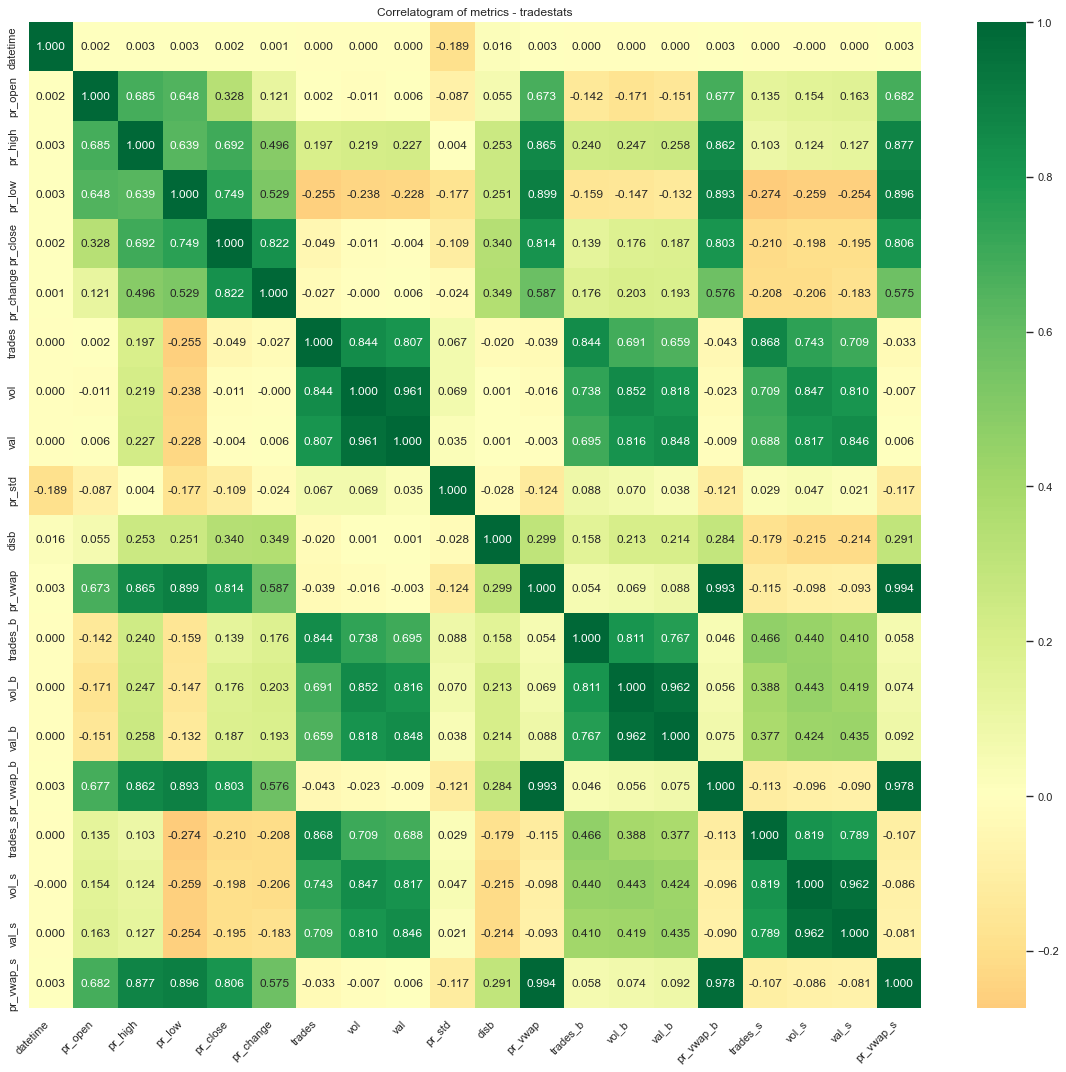

In [203]:
df_filtered = df_11.copy()
# df_filtered = df.drop('datetime', axis=1)
plt.figure(figsize=(18, 16), dpi=80)
sns.heatmap(df_filtered.corr(), xticklabels=df_filtered.corr().columns, yticklabels=df_filtered.corr().columns, cmap='RdYlGn', center=0, annot=True, fmt=".3f")
plt.title(f'Correlatogram of metrics - {metric}')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Проверим ещё корреляцию с медленной SMA(64) и быстрой SMA(16).

In [204]:
df_12 = df.copy()

sma_fast = 16
sma_slow = 64

ma = sma_fast
smaString="Sma_"+str(ma)
df_12[smaString] = df_12['pr_close'].rolling(ma).mean()

ma = sma_slow
smaString="Sma_"+str(ma)
df_12[smaString] = df_12['pr_close'].rolling(ma).mean()

df_12

datetime  pr_open  pr_high  pr_low  pr_close  pr_change  \
0      2020-01-03 10:00:00   255.97   256.97  255.85    256.77     0.3125   
1      2020-01-03 10:05:00   256.77   256.90  256.30    256.70    -0.0273   
2      2020-01-03 10:10:00   256.68   256.75  256.03    256.12    -0.2182   
3      2020-01-03 10:15:00   256.19   256.42  255.83    255.89    -0.1171   
4      2020-01-03 10:20:00   255.89   256.31  255.88    256.13     0.0938   
...                    ...      ...      ...     ...       ...        ...   
100854 2023-12-05 18:15:00   277.32   277.45  277.30    277.39     0.0252   
100855 2023-12-05 18:20:00   277.39   277.69  277.26    277.27    -0.0433   
100856 2023-12-05 18:25:00   277.27   277.43  277.15    277.24    -0.0108   
100857 2023-12-05 18:30:00   277.25   277.36  277.16    277.18    -0.0252   
100858 2023-12-05 18:35:00   277.18   277.18  276.86    276.86    -0.1154   

        trades     vol          val  pr_std  ...  trades_b  vol_b  \
0         1935  116141  297831085.0  0.0001  ...      1091  66691   
1         1070   91089  233774043.0  0.0001  ...       607  53495   
2          664   44029  112878288.0  0.0001  ...       270  15308   
3          821   47233  120941565.0  0.0001  ...       348  20341   
4          501   21910   56115025.0  0.0001  ...       253  13806   
...        ...     ...          ...     ...  ...       ...    ...   
100854     451   24935   69159361.0  0.0001  ...       244  13380   
100855    1075   74770  207505569.0  0.0000  ...       505  32324   
100856     456   25381   70372954.0  0.0001  ...       232  12486   
100857     374   16819   46629035.0  0.0001  ...       172   5239   
100858     828   38953  107915220.0  0.0001  ...       421  20208   

              val_b  pr_vwap_b  trades_s  vol_s        val_s  pr_vwap_s  \
0       171039244.0     256.47       844  49450  126791841.0     256.40   
1       137298083.0     256.66       463  37594   96475959.0     256.63   
2        39244498.0     256.37       394  28721   73633790.0     256.38   
3        52097439.0     256.12       473  26892   68844126.0     256.00   
4        35361727.0     256.13       248   8104   20753298.0     256.09   
...             ...        ...       ...    ...          ...        ...   
100854   37111081.0     277.36       207  11555   32048280.0     277.35   
100855   89709850.0     277.53       570  42446  117795719.0     277.52   
100856   34618698.0     277.26       224  12895   35754256.0     277.27   
100857   14524194.0     277.23       202  11580   32104841.0     277.24   
100858   55983007.0     277.03       407  18745   51932212.0     277.05   

            Sma_16      Sma_64  
0              NaN         NaN  
1              NaN         NaN  
2              NaN         NaN  
3              NaN         NaN  
4              NaN         NaN  
...            ...         ...  
100854  276.794375  275.213750  
100855  276.874375  275.287656  
100856  276.953750  275.360156  
100857  276.972500  275.430156  
100858  276.982500  275.486562  

[100859 rows x 22 columns]

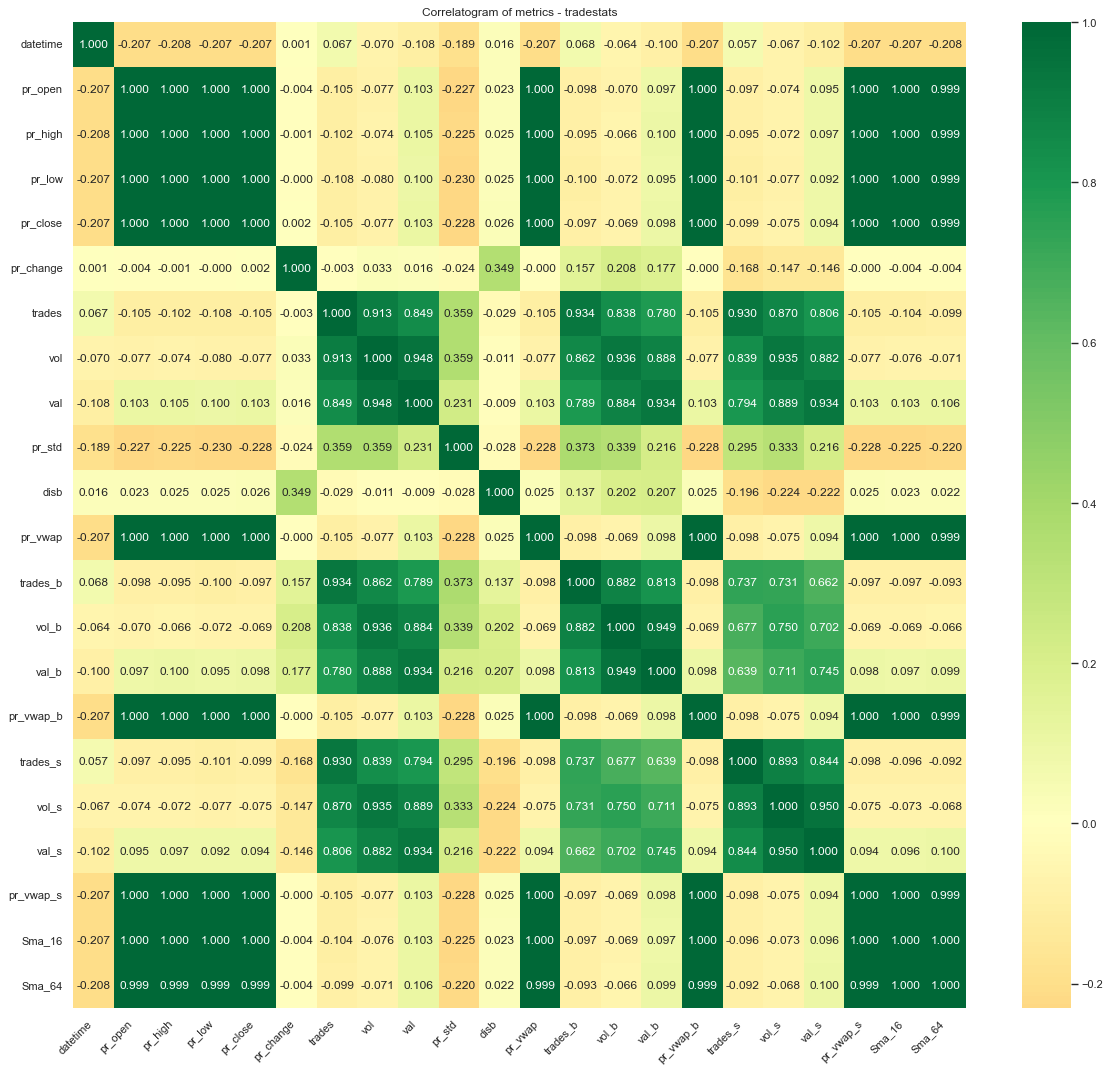

In [205]:
df_filtered = df_12.copy()
# df_filtered = df.drop('datetime', axis=1)
plt.figure(figsize=(18, 16), dpi=80)
sns.heatmap(df_filtered.corr(), xticklabels=df_filtered.corr().columns, yticklabels=df_filtered.corr().columns, cmap='RdYlGn', center=0, annot=True, fmt=".3f")
plt.title(f'Correlatogram of metrics - {metric}')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Что и требовалось доказать, конечно цена имеет корреляцию с медленной SMA(64) и быстрой SMA(16).

Теперь проанализируем метрики из orderstats с помощью коррелограммы.

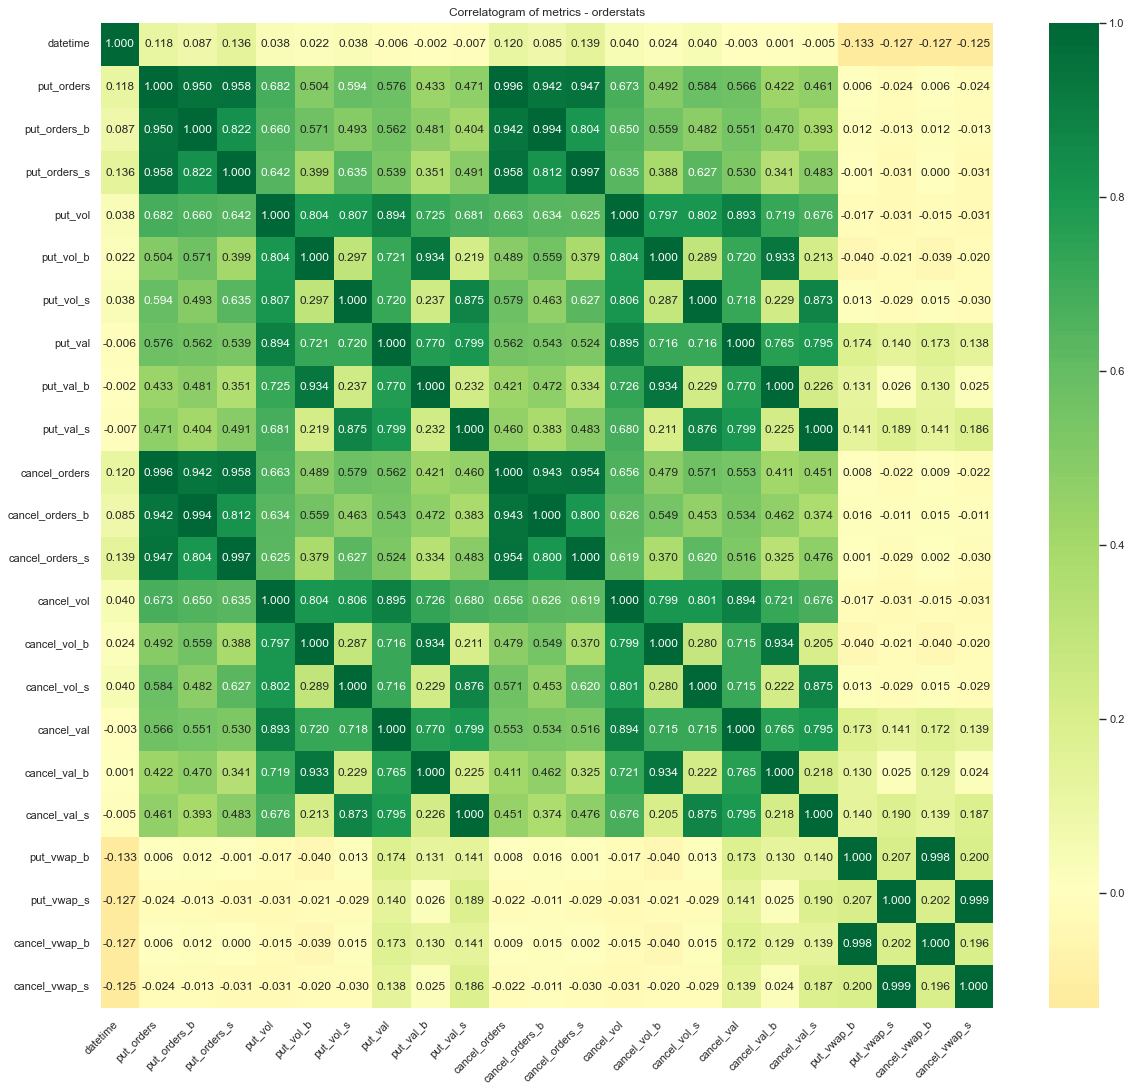

In [206]:
symbol = 'SBER'  # Тикер, который будем исследовать

# metrics = ('tradestats', 'orderstats', 'obstats')  # Метрики
metric = 'orderstats'  # будем использовать некоторые метрики из orderstats, у них только один ТФ = M5
file_name = os.path.join('csv', f'{symbol}_{metric}.csv')
df = pd.read_csv(file_name, sep=',', parse_dates=['datetime'])  # Считываем файл в DataFrame
df
df_2 = df.copy()
df_filtered = df_2.copy()
# df_filtered = df.drop('datetime', axis=1)
plt.figure(figsize=(18, 16), dpi=80)
sns.heatmap(df_filtered.corr(), xticklabels=df_filtered.corr().columns, yticklabels=df_filtered.corr().columns, cmap='RdYlGn', center=0, annot=True, fmt=".3f")
plt.title(f'Correlatogram of metrics - {metric}')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

* Сильная положительная корреляция между 'put_orders', 'put_orders_b', 'put_orders_s', 'put_vol', 'put_vol_b', 'put_vol_s', 'put_val', 'put_val_b', 'put_val_s', 'cancel_orders', 'cancel_orders_b', 'cancel_orders_s', 'cancel_vol', 'cancel_vol_b', 'cancel_vol_s', 'cancel_val', 'cancel_val_b', 'cancel_val_s' означает, что кол-во/объемы заявок (покупка/продажа) в не зависимоти от направления сделки или типа операции - меняются похожим образом, и из них можно взять один параметр, т.к. остальные сильно связаны

* Сильная корреляция между 'put_vwap_b' и 'cancel_vwap_b', 'put_vwap_s' и 'cancel_vwap_s' означает, что поведение средневзвешенной цены отмененных заявок такое же как и у средневзвешенной цены заявок на покупку/продажу

* Средняя корреляция между 'put_vwap_b'и 'put_vwap_s', 'cancel_vwap_b' и 'cancel_vwap_s' означает, что здесь есть интересные данные для анализа 

Теперь проанализируем метрики из obstats с помощью коррелограммы.

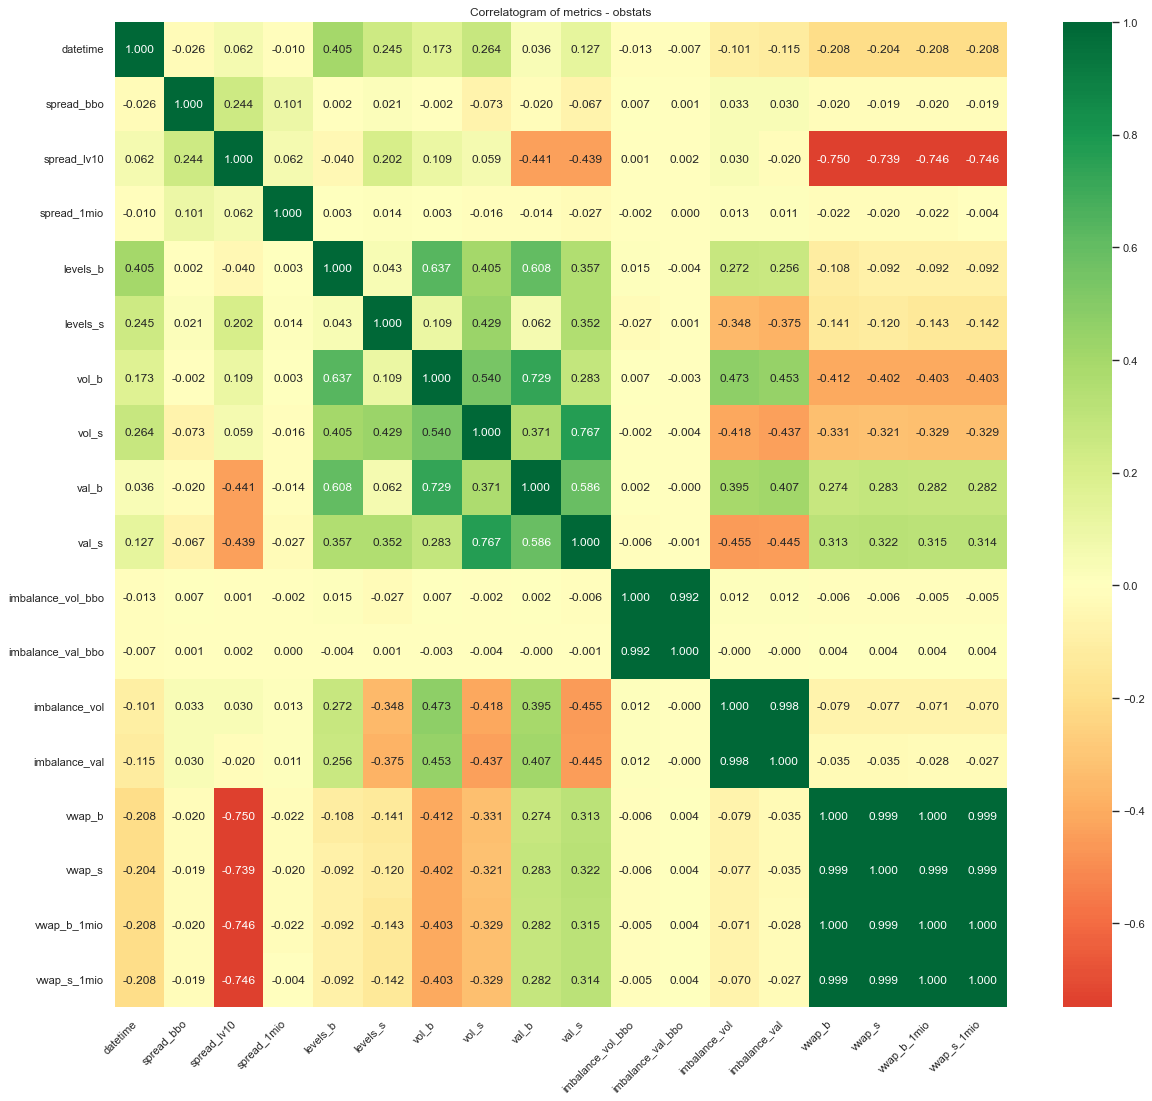

In [207]:
symbol = 'SBER'  # Тикер, который будем исследовать

# metrics = ('tradestats', 'orderstats', 'obstats')  # Метрики
metric = 'obstats'  # будем использовать некоторые метрики из orderstats, у них только один ТФ = M5
file_name = os.path.join('csv', f'{symbol}_{metric}.csv')
df = pd.read_csv(file_name, sep=',', parse_dates=['datetime'])  # Считываем файл в DataFrame
df
df_3 = df.copy()
df_filtered = df_3.copy()
# df_filtered = df.drop('datetime', axis=1)
plt.figure(figsize=(18, 16), dpi=80)
sns.heatmap(df_filtered.corr(), xticklabels=df_filtered.corr().columns, yticklabels=df_filtered.corr().columns, cmap='RdYlGn', center=0, annot=True, fmt=".3f")
plt.title(f'Correlatogram of metrics - {metric}')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

* Средняя положительная корреляция между 'spread_bbo' и 'spread_lv10' означает, что спред между лучшей ценой покупки и продажи имеет влияние на спред между 10ым уровнем цен покупки и продажи

* Средняя отрицательная корреляция между 'spread_lv10' и 'val_b', 'val_s', 'vwap_b', 'vwap_s', 'vwap_b_1mio', 'vwap_s_1mio' означает, что спред между 10ым уровнем цен покупки и продажи меняется обратно средневзвешенным ценам покупки/продажи

Видим, что в этом наборе больше интересных данных.

Теперь посмотрим на них вместе (объединим три df)

In [208]:
df_1.set_index('datetime', inplace=True)
df_2.set_index('datetime', inplace=True)
df_3.set_index('datetime', inplace=True)

In [209]:
df_123 = pd.concat([df_1, df_2, df_3], axis=1)

In [210]:
df_123

pr_open  pr_high  pr_low  pr_close  pr_change  trades  \
datetime                                                                     
2020-01-03 10:00:00   255.97   256.97  255.85    256.77     0.3125  1935.0   
2020-01-03 10:05:00   256.77   256.90  256.30    256.70    -0.0273  1070.0   
2020-01-03 10:10:00   256.68   256.75  256.03    256.12    -0.2182   664.0   
2020-01-03 10:15:00   256.19   256.42  255.83    255.89    -0.1171   821.0   
2020-01-03 10:20:00   255.89   256.31  255.88    256.13     0.0938   501.0   
...                      ...      ...     ...       ...        ...     ...   
2023-12-05 18:15:00   277.32   277.45  277.30    277.39     0.0252   451.0   
2023-12-05 18:20:00   277.39   277.69  277.26    277.27    -0.0433  1075.0   
2023-12-05 18:25:00   277.27   277.43  277.15    277.24    -0.0108   456.0   
2023-12-05 18:30:00   277.25   277.36  277.16    277.18    -0.0252   374.0   
2023-12-05 18:35:00   277.18   277.18  276.86    276.86    -0.1154   828.0   

                          vol          val  pr_std  disb  ...         val_b  \
datetime                                                  ...                 
2020-01-03 10:00:00  116141.0  297831085.0  0.0001  0.15  ...  2.527382e+08   
2020-01-03 10:05:00   91089.0  233774043.0  0.0001  0.17  ...  3.026991e+08   
2020-01-03 10:10:00   44029.0  112878288.0  0.0001 -0.30  ...  3.403240e+08   
2020-01-03 10:15:00   47233.0  120941565.0  0.0001 -0.14  ...  3.218600e+08   
2020-01-03 10:20:00   21910.0   56115025.0  0.0001  0.26  ...  3.482888e+08   
...                       ...          ...     ...   ...  ...           ...   
2023-12-05 18:15:00   24935.0   69159361.0  0.0001  0.07  ...           NaN   
2023-12-05 18:20:00   74770.0  207505569.0  0.0000 -0.14  ...           NaN   
2023-12-05 18:25:00   25381.0   70372954.0  0.0001 -0.02  ...           NaN   
2023-12-05 18:30:00   16819.0   46629035.0  0.0001 -0.38  ...           NaN   
2023-12-05 18:35:00   38953.0  107915220.0  0.0001  0.04  ...  1.434683e+09   

                            val_s  imbalance_vol_bbo  imbalance_val_bbo  \
datetime                                                                  
2020-01-03 10:00:00  3.669902e+08               0.07               0.07   
2020-01-03 10:05:00  3.897488e+08               0.09               0.09   
2020-01-03 10:10:00  3.997220e+08              -0.16              -0.16   
2020-01-03 10:15:00  3.931452e+08               0.03               0.03   
2020-01-03 10:20:00  3.952557e+08               0.20               0.20   
...                           ...                ...                ...   
2023-12-05 18:15:00           NaN                NaN                NaN   
2023-12-05 18:20:00           NaN                NaN                NaN   
2023-12-05 18:25:00           NaN                NaN                NaN   
2023-12-05 18:30:00           NaN                NaN                NaN   
2023-12-05 18:35:00  1.208365e+09              -0.47              -0.47   

                     imbalance_vol  imbalance_val  vwap_b  vwap_s  \
datetime                                                            
2020-01-03 10:00:00          -0.16          -0.18  250.76  262.28   
2020-01-03 10:05:00          -0.11          -0.13  251.48  261.81   
2020-01-03 10:10:00          -0.06          -0.08  251.75  261.81   
2020-01-03 10:15:00          -0.08          -0.10  251.37  261.89   
2020-01-03 10:20:00          -0.04          -0.06  251.64  262.00   
...                            ...            ...     ...     ...   
2023-12-05 18:15:00            NaN            NaN     NaN     NaN   
2023-12-05 18:20:00            NaN            NaN     NaN     NaN   
2023-12-05 18:25:00            NaN            NaN     NaN     NaN   
2023-12-05 18:30:00            NaN            NaN     NaN     NaN   
2023-12-05 18:35:00           0.11           0.09  270.45  283.60   

                     vwap_b_1mio  vwap_s_1mio  
datetime                                       
2020-01-

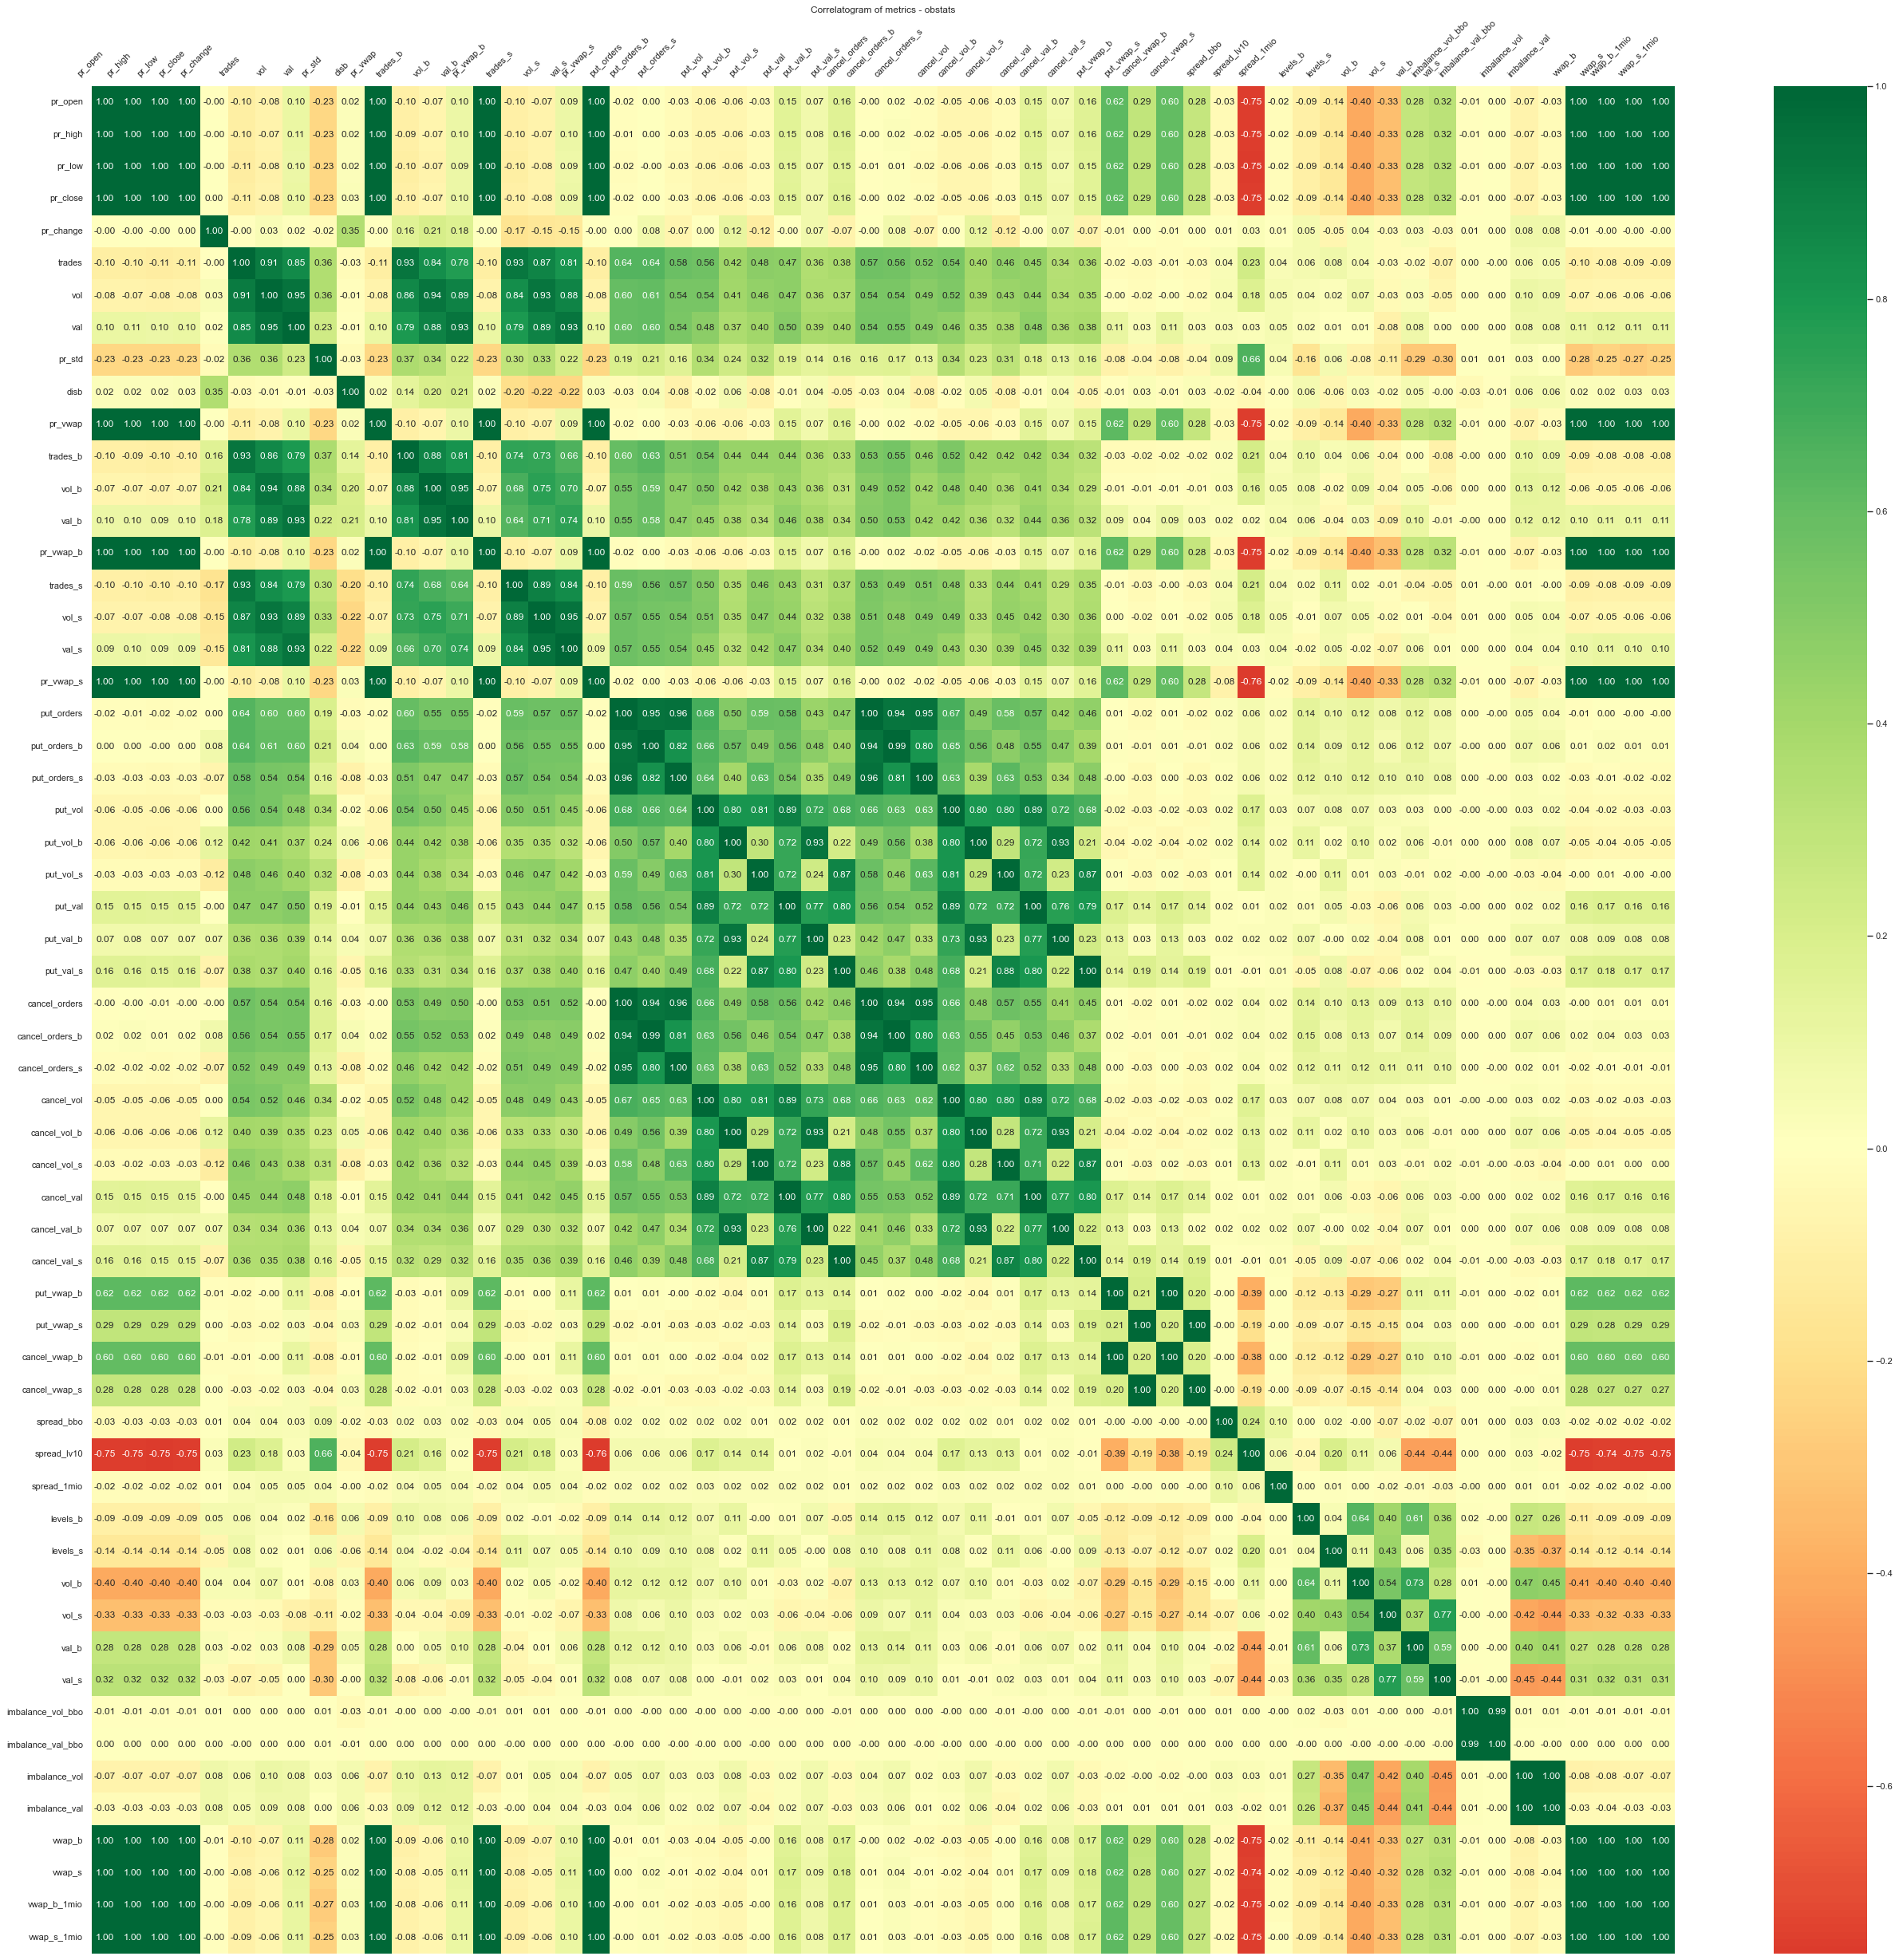

In [211]:
df_filtered = df_123.copy()
# df_filtered = df.drop('datetime', axis=1)
plt.figure(figsize=(40, 38), dpi=80)
sns.heatmap(df_filtered.corr(), xticklabels=df_filtered.corr().columns, yticklabels=df_filtered.corr().columns, cmap='RdYlGn', center=0, annot=True, fmt=".2f")
plt.title(f'Correlatogram of metrics - {metric}')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Или даже посмотрим на них вместе (объединим три df) - но в качестве вервого набора - будет видоизмененный с дельтами.

In [212]:
df_11.set_index('datetime', inplace=True)
df_123_v2 = pd.concat([df_11, df_2, df_3], axis=1)
df_123_v2

pr_open  pr_high  pr_low  pr_close  pr_change  trades  \
datetime                                                                     
2020-01-03 10:00:00      NaN      NaN     NaN       NaN     0.3125     NaN   
2020-01-03 10:05:00     0.80    -0.07    0.45     -0.07    -0.0273  -865.0   
2020-01-03 10:10:00    -0.09    -0.15   -0.27     -0.58    -0.2182  -406.0   
2020-01-03 10:15:00    -0.49    -0.33   -0.20     -0.23    -0.1171   157.0   
2020-01-03 10:20:00    -0.30    -0.11    0.05      0.24     0.0938  -320.0   
...                      ...      ...     ...       ...        ...     ...   
2023-12-05 18:15:00     0.22     0.09    0.20      0.08     0.0252  -186.0   
2023-12-05 18:20:00     0.07     0.24   -0.04     -0.12    -0.0433   624.0   
2023-12-05 18:25:00    -0.12    -0.26   -0.11     -0.03    -0.0108  -619.0   
2023-12-05 18:30:00    -0.02    -0.07    0.01     -0.06    -0.0252   -82.0   
2023-12-05 18:35:00    -0.07    -0.18   -0.30     -0.32    -0.1154   454.0   

                         vol          val  pr_std  disb  ...         val_b  \
datetime                                                 ...                 
2020-01-03 10:00:00      NaN          NaN  0.0001  0.15  ...  2.527382e+08   
2020-01-03 10:05:00 -25052.0  -64057042.0  0.0001  0.17  ...  3.026991e+08   
2020-01-03 10:10:00 -47060.0 -120895755.0  0.0001 -0.30  ...  3.403240e+08   
2020-01-03 10:15:00   3204.0    8063277.0  0.0001 -0.14  ...  3.218600e+08   
2020-01-03 10:20:00 -25323.0  -64826540.0  0.0001  0.26  ...  3.482888e+08   
...                      ...          ...     ...   ...  ...           ...   
2023-12-05 18:15:00   5674.0   15750833.0  0.0001  0.07  ...           NaN   
2023-12-05 18:20:00  49835.0  138346208.0  0.0000 -0.14  ...           NaN   
2023-12-05 18:25:00 -49389.0 -137132615.0  0.0001 -0.02  ...           NaN   
2023-12-05 18:30:00  -8562.0  -23743919.0  0.0001 -0.38  ...           NaN   
2023-12-05 18:35:00  22134.0   61286185.0  0.0001  0.04  ...  1.434683e+09   

                            val_s  imbalance_vol_bbo  imbalance_val_bbo  \
datetime                                                                  
2020-01-03 10:00:00  3.669902e+08               0.07               0.07   
2020-01-03 10:05:00  3.897488e+08               0.09               0.09   
2020-01-03 10:10:00  3.997220e+08              -0.16              -0.16   
2020-01-03 10:15:00  3.931452e+08               0.03               0.03   
2020-01-03 10:20:00  3.952557e+08               0.20               0.20   
...                           ...                ...                ...   
2023-12-05 18:15:00           NaN                NaN                NaN   
2023-12-05 18:20:00           NaN                NaN                NaN   
2023-12-05 18:25:00           NaN                NaN                NaN   
2023-12-05 18:30:00           NaN                NaN                NaN   
2023-12-05 18:35:00  1.208365e+09              -0.47              -0.47   

                     imbalance_vol  imbalance_val  vwap_b  vwap_s  \
datetime                                                            
2020-01-03 10:00:00          -0.16          -0.18  250.76  262.28   
2020-01-03 10:05:00          -0.11          -0.13  251.48  261.81   
2020-01-03 10:10:00          -0.06          -0.08  251.75  261.81   
2020-01-03 10:15:00          -0.08          -0.10  251.37  261.89   
2020-01-03 10:20:00          -0.04          -0.06  251.64  262.00   
...                            ...            ...     ...     ...   
2023-12-05 18:15:00            NaN            NaN     NaN     NaN   
2023-12-05 18:20:00            NaN            NaN     NaN     NaN   
2023-12-05 18:25:00            NaN            NaN     NaN     NaN   
2023-12-05 18:30:00            NaN            NaN     NaN     NaN   
2023-12-05 18:35:00           0.11           0.09  270.45  283.60   

                     vwap_b_1mio  vwap_s_1mio  
datetime                                       
2020-01-03 10:00:00  

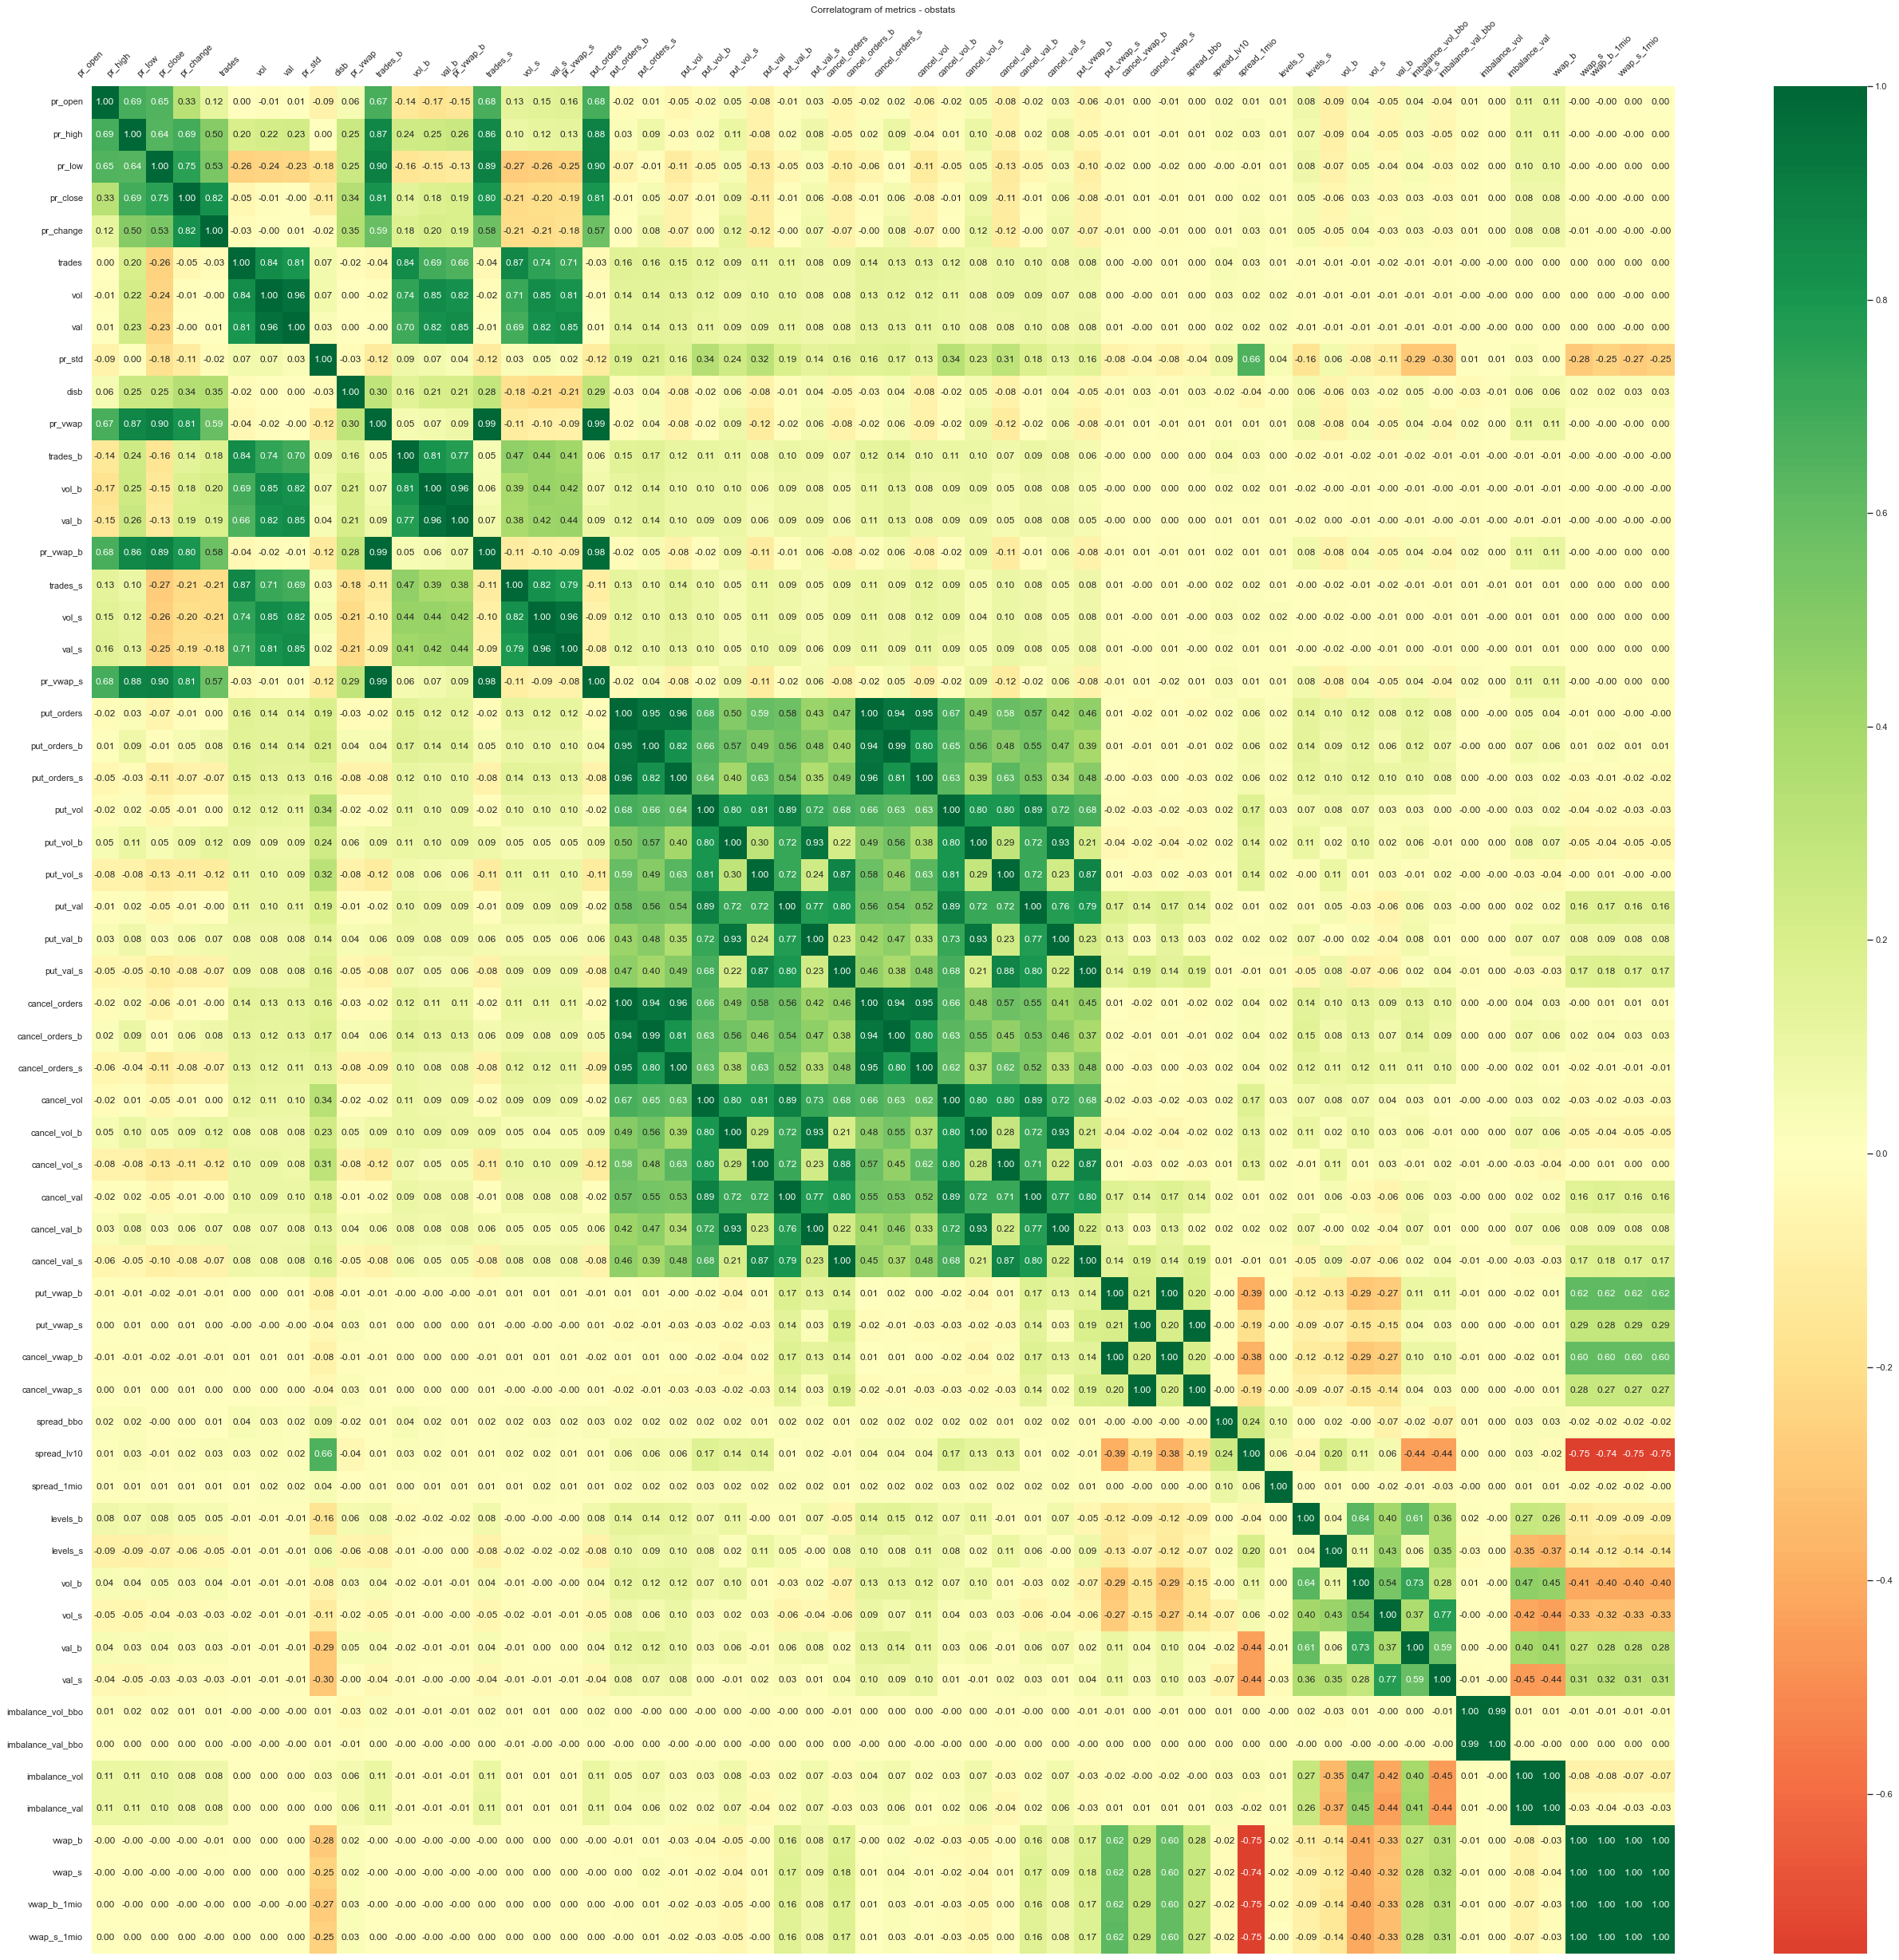

In [213]:
df_filtered = df_123_v2.copy()
# df_filtered = df.drop('datetime', axis=1)
plt.figure(figsize=(40, 38), dpi=80)
sns.heatmap(df_filtered.corr(), xticklabels=df_filtered.corr().columns, yticklabels=df_filtered.corr().columns, cmap='RdYlGn', center=0, annot=True, fmt=".2f")
plt.title(f'Correlatogram of metrics - {metric}')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Видим большое кол-во метрик, которые можно использовать.

Остановимся на нескольких:
1) pr_change - изменение цены за период, % - tradestats

2) put_vol_b - объем завок поставленных в стакан (покупка) - orderstats

3) imbalance_vol - дисбаланс объема на всем стакане (все уровни) - obstats

Будем предсказывать закрытие свечи, оно будет выше предудущего или ниже.

In [214]:
df_nn = df_123.copy()
df_nn = df_nn[["pr_close", "pr_change", "put_vol_b", "imbalance_vol"]]
df_nn["d_close"] = df_nn["pr_close"].diff()  # чтобы смотреть закрытие выше предыдущего или ниже
df_nn.dropna(inplace=True)
df_nn

pr_close  pr_change  put_vol_b  imbalance_vol  d_close
datetime                                                                   
2020-01-03 10:05:00    256.70    -0.0273   561007.0          -0.11    -0.07
2020-01-03 10:10:00    256.12    -0.2182   244967.0          -0.06    -0.58
2020-01-03 10:15:00    255.89    -0.1171   272449.0          -0.08    -0.23
2020-01-03 10:20:00    256.13     0.0938   221155.0          -0.04     0.24
2020-01-03 10:25:00    256.29     0.0390   130780.0          -0.02     0.16
...                       ...        ...        ...            ...      ...
2023-12-05 17:40:00    276.75    -0.1047   815005.0           0.09    -0.35
2023-12-05 17:45:00    276.85     0.0361   386520.0           0.08     0.10
2023-12-05 17:50:00    276.85     0.0000   373116.0           0.09     0.00
2023-12-05 18:00:00    277.23     0.1409   582104.0           0.07     0.40
2023-12-05 18:35:00    276.86    -0.1154   125212.0           0.11    -0.32

[99573 rows x 5 columns]

Нормализируем данные для обучения нейросети.

Посмотрим на данные, которые мы выбрали.

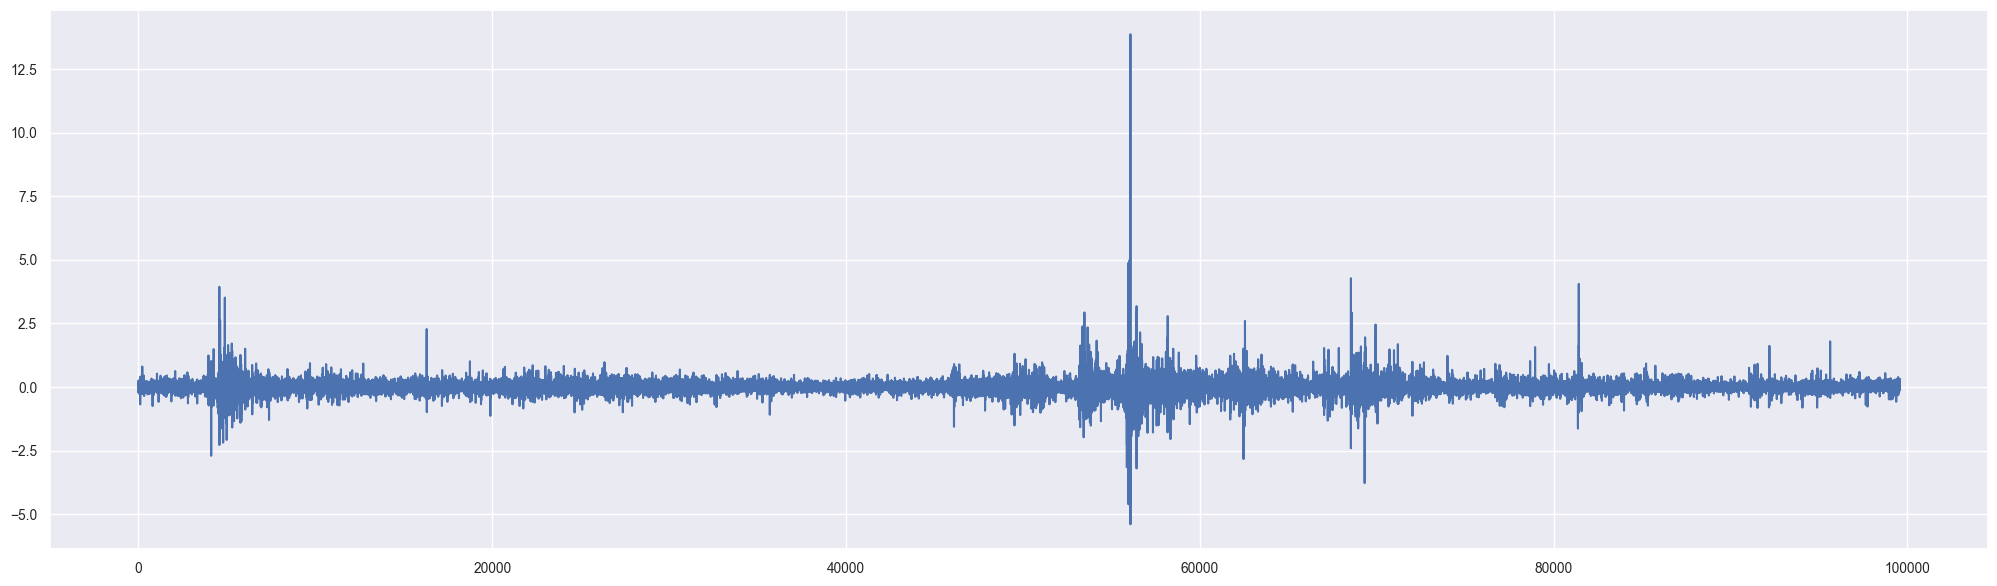

In [215]:
pr_change = df_nn['pr_change']
fig = plt.figure(figsize=(25, 7))
plt.plot(np.arange(len(pr_change)), pr_change)

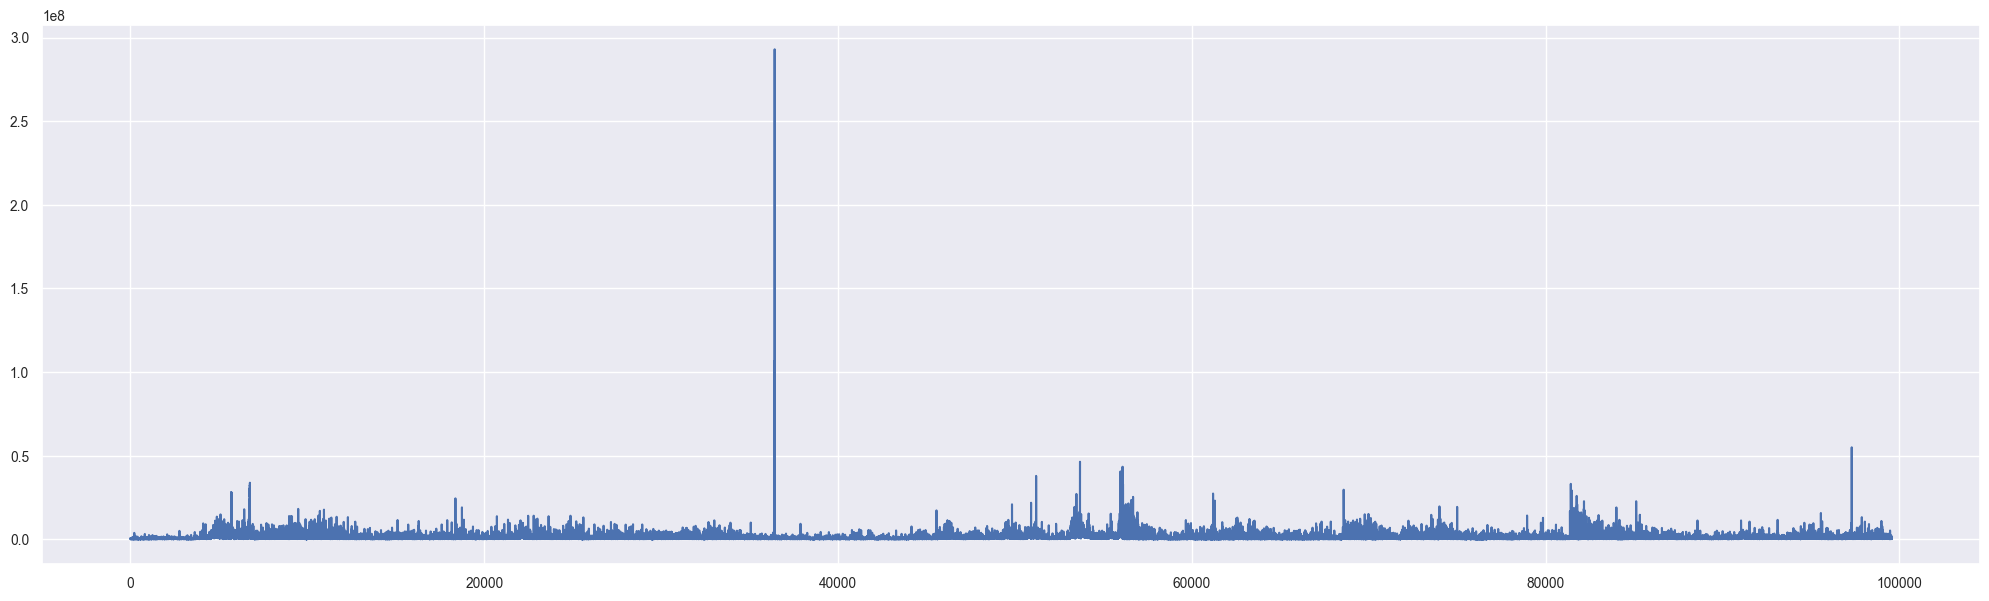

In [216]:
put_vol_b = df_nn['put_vol_b']
fig = plt.figure(figsize=(25, 7))
plt.plot(np.arange(len(put_vol_b)), put_vol_b)

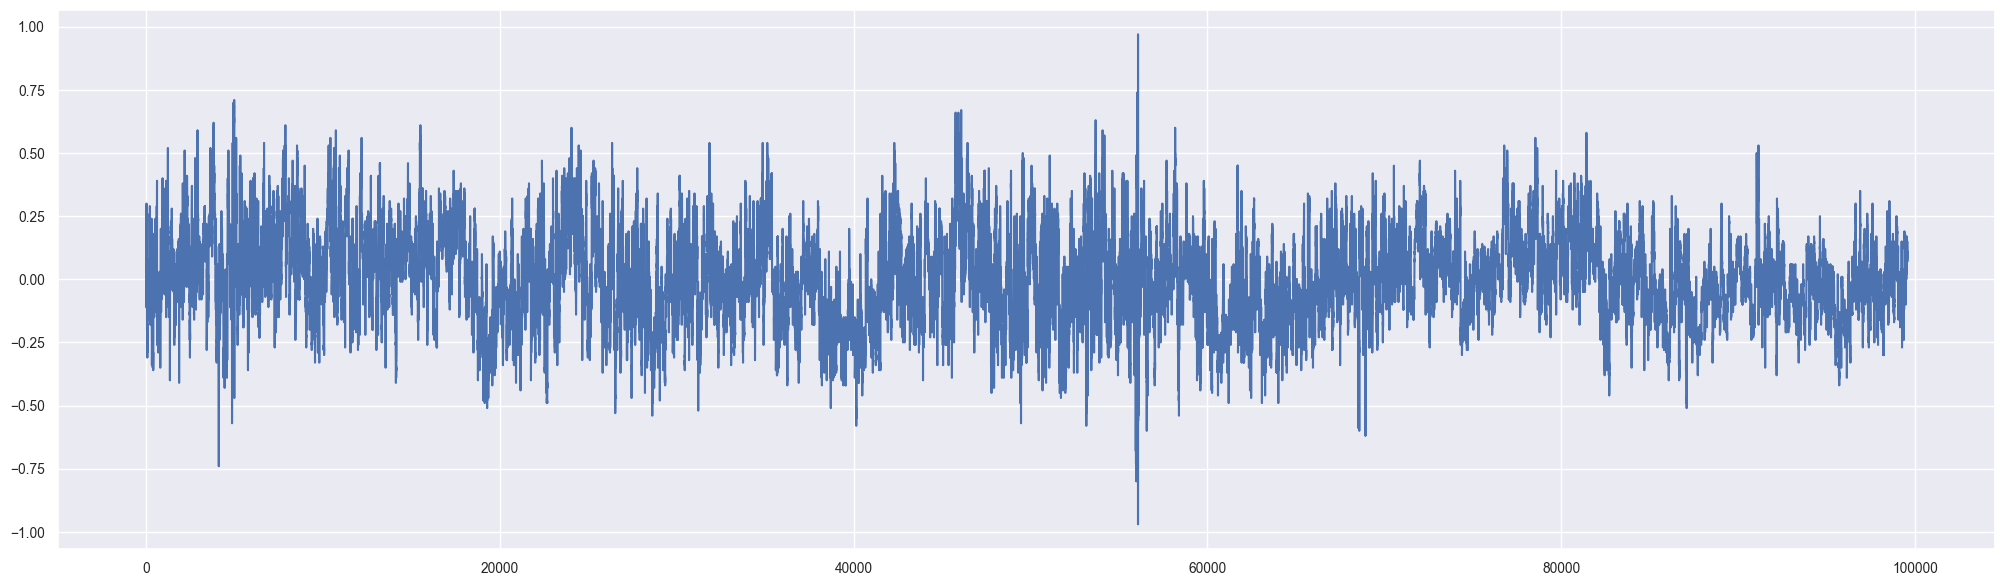

In [217]:
imbalance_vol = df_nn['imbalance_vol']
fig = plt.figure(figsize=(25, 7))
plt.plot(np.arange(len(imbalance_vol)), imbalance_vol)

Видим данными необходимо поработать, чтобы можно было использовать для обучения нейросети.

In [218]:
def sigmoid3(x): return x / math.sqrt(1+x*x)

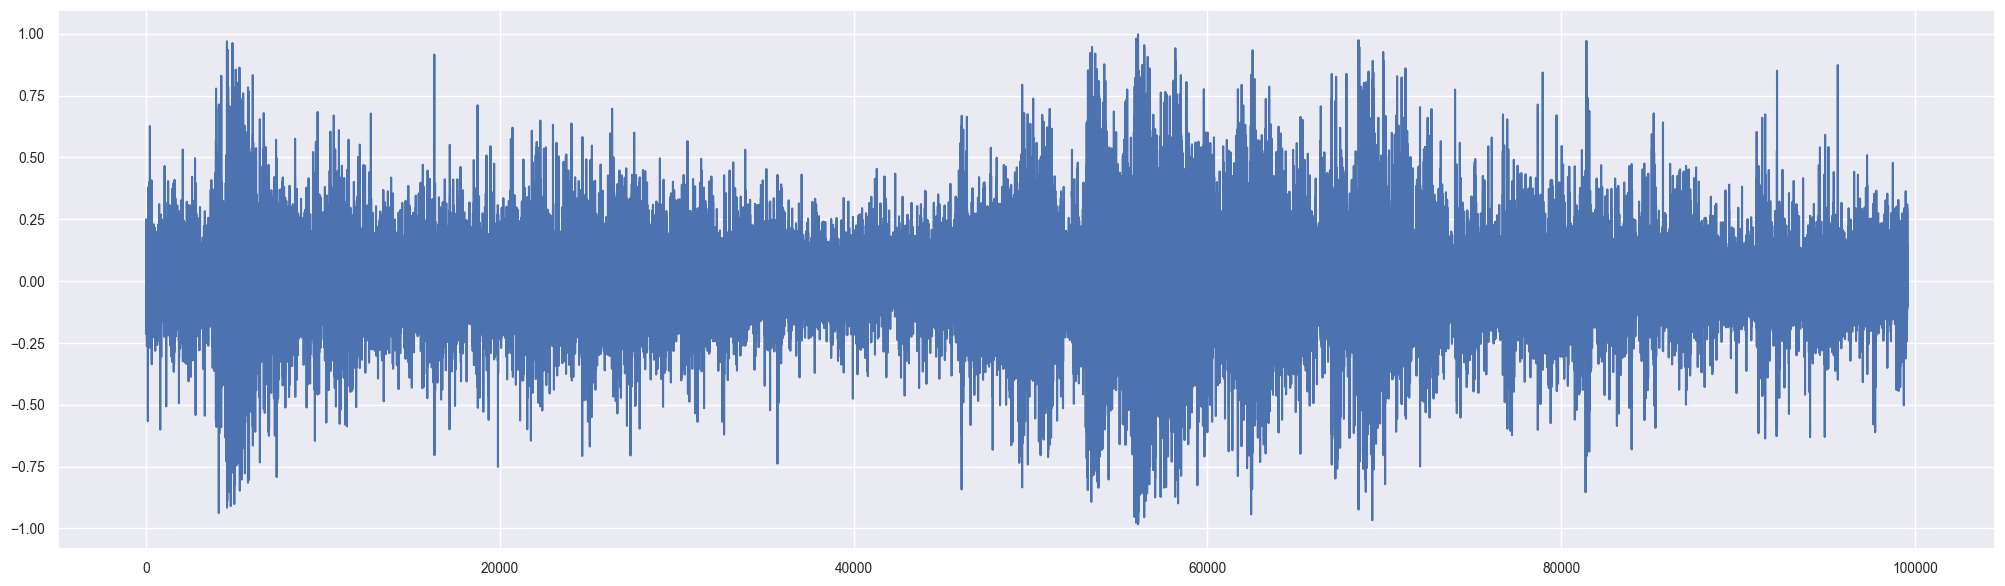

In [219]:
# применение Корневой сигмоиды к pr_change лучше всего корреляция с норм. распределением
df_nn['pr_change'] = df_nn['pr_change'].apply(sigmoid3)
_data = df_nn['pr_change']
fig = plt.figure(figsize=(25, 7))
plt.plot(np.arange(len(_data)), _data)

Дифференцируем put_vwap_b

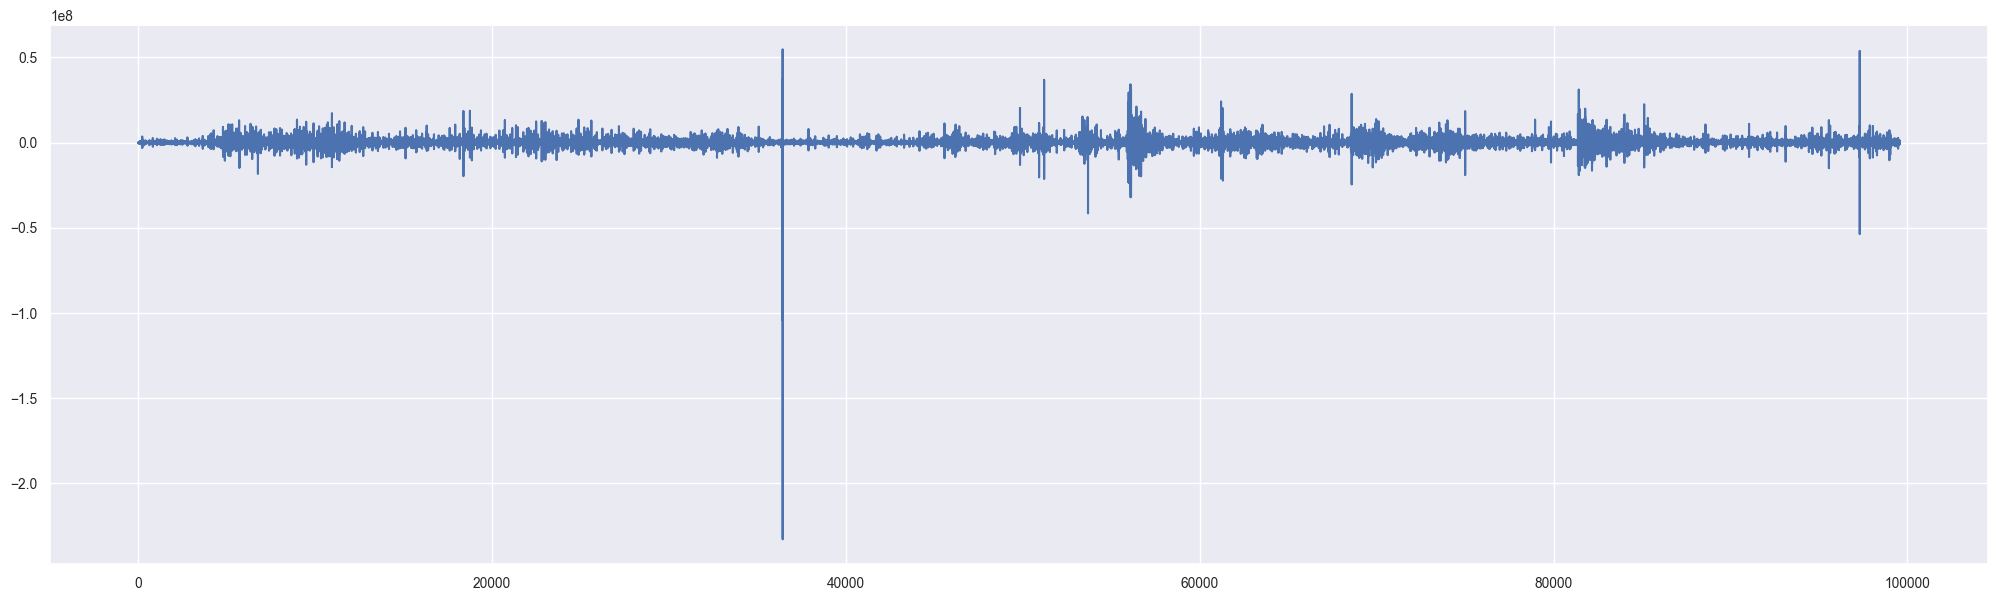

In [220]:
df_nn['put_vol_b'] = df_nn['put_vol_b'].diff()
_data = df_nn['put_vol_b']
fig = plt.figure(figsize=(25, 7))
plt.plot(np.arange(len(_data)), _data)

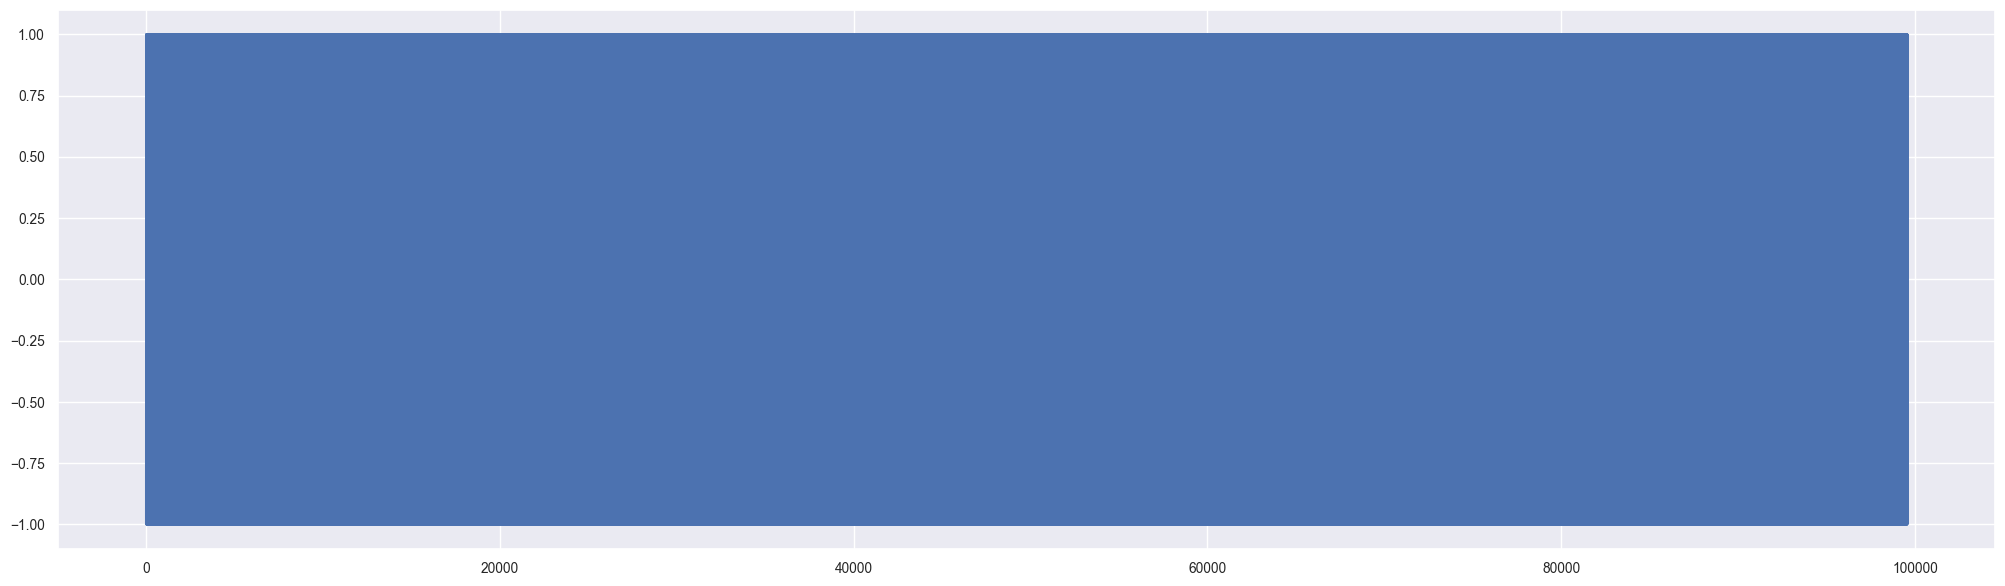

In [221]:
# применение Корневой сигмоиды к put_vwap_b лучше всего корреляция с норм. распределением
df_nn['put_vol_b'] = df_nn['put_vol_b'].apply(sigmoid3)
_data = df_nn['put_vol_b']
fig = plt.figure(figsize=(25, 7))
plt.plot(np.arange(len(_data)), _data)

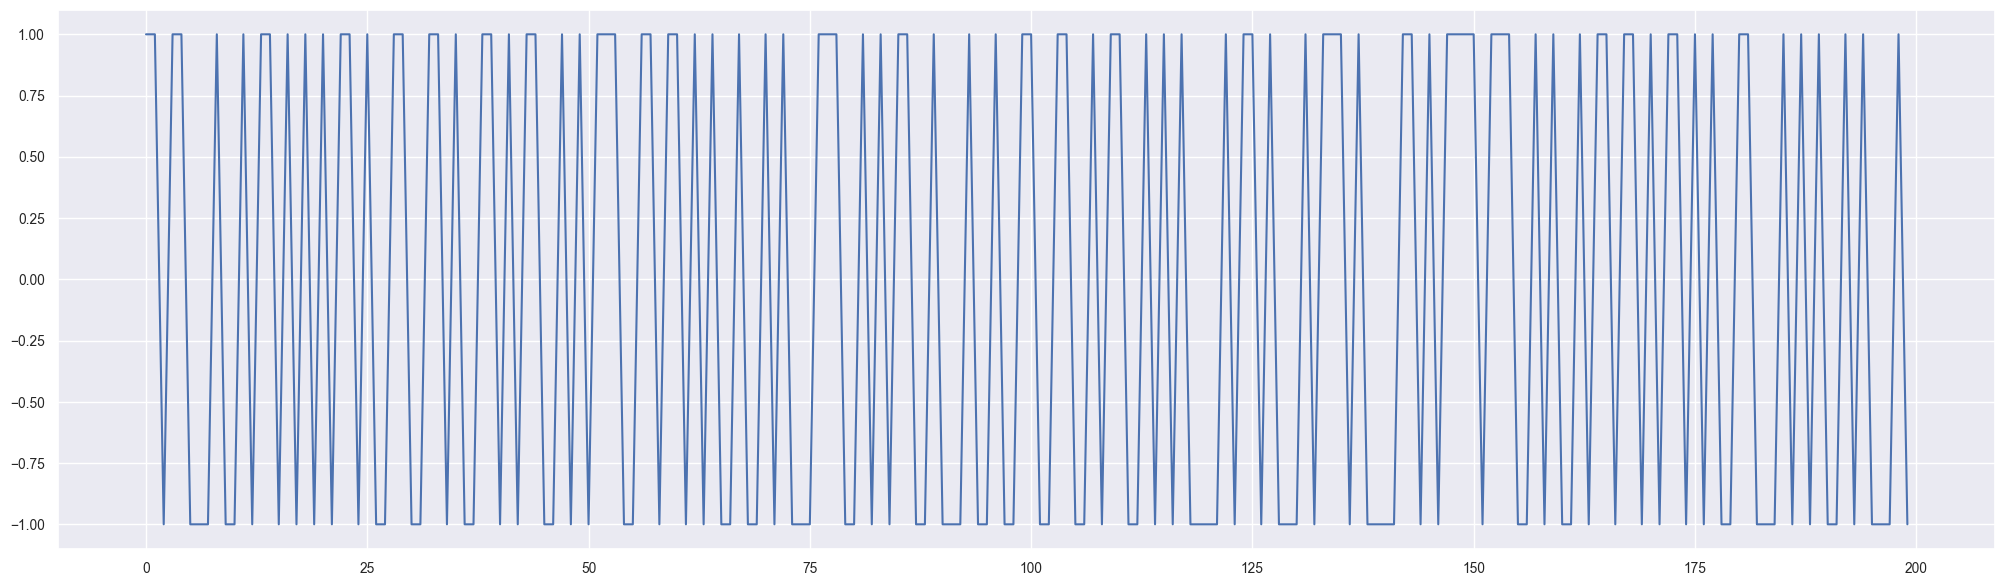

In [222]:
# Вывод последних N значений нормализованной put_vwap_b
N = 200 # len(tradestats)
_data = df_nn['put_vol_b'][len(df_nn)-N:]
fig = plt.figure(figsize=(25, 7))
plt.plot(np.arange(len(_data[len(_data)-N:])), _data[len(_data)-N:])

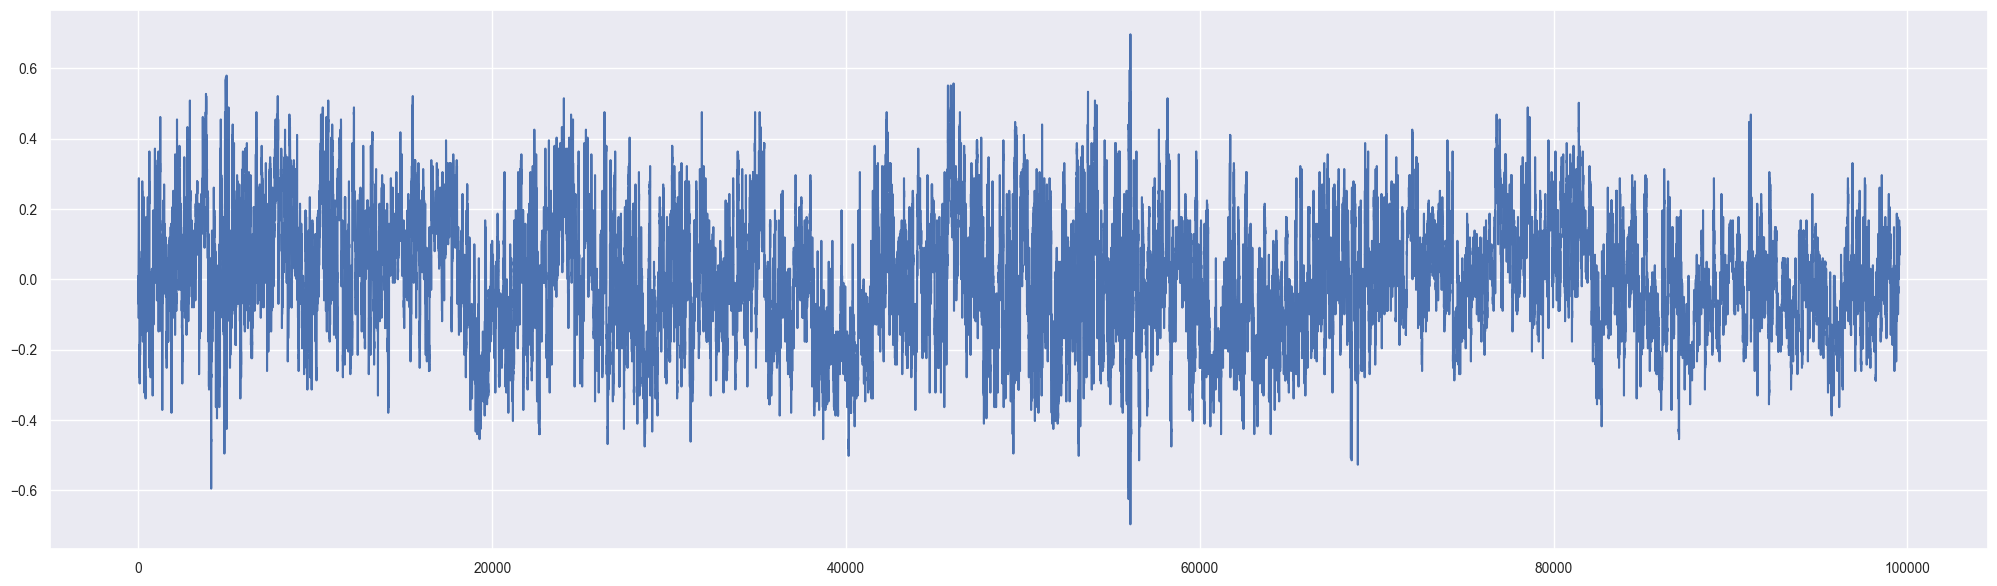

In [223]:
# применение Корневой сигмоиды к pr_change лучше всего корреляция с норм. распределением
df_nn['imbalance_vol'] = df_nn['imbalance_vol'].apply(sigmoid3)
_data = df_nn['imbalance_vol']
fig = plt.figure(figsize=(25, 7))
plt.plot(np.arange(len(_data)), _data)

In [224]:
df_nn.dropna(inplace=True)
df_nn

pr_close  pr_change  put_vol_b  imbalance_vol  d_close
datetime                                                                   
2020-01-03 10:10:00    256.12  -0.213184       -1.0      -0.059892    -0.58
2020-01-03 10:15:00    255.89  -0.116305        1.0      -0.079745    -0.23
2020-01-03 10:20:00    256.13   0.093390       -1.0      -0.039968     0.24
2020-01-03 10:25:00    256.29   0.038970       -1.0      -0.019996     0.16
2020-01-03 10:30:00    256.22   0.007800       -1.0       0.010000    -0.07
...                       ...        ...        ...            ...      ...
2023-12-05 17:40:00    276.75  -0.104131       -1.0       0.089638    -0.35
2023-12-05 17:45:00    276.85   0.036077       -1.0       0.079745     0.10
2023-12-05 17:50:00    276.85   0.000000       -1.0       0.089638     0.00
2023-12-05 18:00:00    277.23   0.139522        1.0       0.069829     0.40
2023-12-05 18:35:00    276.86  -0.114639       -1.0       0.109340    -0.32

[99572 rows x 5 columns]

In [225]:
df_nn["d_close"] = np.where(df_nn['d_close'] > 0, 1, 0)
df_nn

pr_close  pr_change  put_vol_b  imbalance_vol  d_close
datetime                                                                   
2020-01-03 10:10:00    256.12  -0.213184       -1.0      -0.059892        0
2020-01-03 10:15:00    255.89  -0.116305        1.0      -0.079745        0
2020-01-03 10:20:00    256.13   0.093390       -1.0      -0.039968        1
2020-01-03 10:25:00    256.29   0.038970       -1.0      -0.019996        1
2020-01-03 10:30:00    256.22   0.007800       -1.0       0.010000        0
...                       ...        ...        ...            ...      ...
2023-12-05 17:40:00    276.75  -0.104131       -1.0       0.089638        0
2023-12-05 17:45:00    276.85   0.036077       -1.0       0.079745        1
2023-12-05 17:50:00    276.85   0.000000       -1.0       0.089638        0
2023-12-05 18:00:00    277.23   0.139522        1.0       0.069829        1
2023-12-05 18:35:00    276.86  -0.114639       -1.0       0.109340        0

[99572 rows x 5 columns]

In [226]:
df_nn.describe().transpose()

count        mean        std        min         25%      50%  \
pr_close       99572.0  229.713425  67.723994  98.920000  173.117500  240.675   
pr_change      99572.0   -0.000127   0.157739  -0.983284   -0.072905    0.000   
put_vol_b      99572.0   -0.040473   0.999185  -1.000000   -1.000000   -1.000   
imbalance_vol  99572.0    0.003552   0.164123  -0.696258   -0.119145    0.000   
d_close        99572.0    0.488722   0.499875   0.000000    0.000000    0.000   

                      75%         max  
pr_close       277.552500  387.730000  
pr_change        0.072013    0.997409  
put_vol_b        1.000000    1.000000  
imbalance_vol    0.119145    0.696258  
d_close          1.000000    1.000000

In [227]:
df_nn

pr_close  pr_change  put_vol_b  imbalance_vol  d_close
datetime                                                                   
2020-01-03 10:10:00    256.12  -0.213184       -1.0      -0.059892        0
2020-01-03 10:15:00    255.89  -0.116305        1.0      -0.079745        0
2020-01-03 10:20:00    256.13   0.093390       -1.0      -0.039968        1
2020-01-03 10:25:00    256.29   0.038970       -1.0      -0.019996        1
2020-01-03 10:30:00    256.22   0.007800       -1.0       0.010000        0
...                       ...        ...        ...            ...      ...
2023-12-05 17:40:00    276.75  -0.104131       -1.0       0.089638        0
2023-12-05 17:45:00    276.85   0.036077       -1.0       0.079745        1
2023-12-05 17:50:00    276.85   0.000000       -1.0       0.089638        0
2023-12-05 18:00:00    277.23   0.139522        1.0       0.069829        1
2023-12-05 18:35:00    276.86  -0.114639       -1.0       0.109340        0

[99572 rows x 5 columns]

In [228]:
_ = df_nn.pop("pr_close")
df_nn

pr_change  put_vol_b  imbalance_vol  d_close
datetime                                                         
2020-01-03 10:10:00  -0.213184       -1.0      -0.059892        0
2020-01-03 10:15:00  -0.116305        1.0      -0.079745        0
2020-01-03 10:20:00   0.093390       -1.0      -0.039968        1
2020-01-03 10:25:00   0.038970       -1.0      -0.019996        1
2020-01-03 10:30:00   0.007800       -1.0       0.010000        0
...                        ...        ...            ...      ...
2023-12-05 17:40:00  -0.104131       -1.0       0.089638        0
2023-12-05 17:45:00   0.036077       -1.0       0.079745        1
2023-12-05 17:50:00   0.000000       -1.0       0.089638        0
2023-12-05 18:00:00   0.139522        1.0       0.069829        1
2023-12-05 18:35:00  -0.114639       -1.0       0.109340        0

[99572 rows x 4 columns]

In [229]:
# пробуем удалить лишнее
_ = df_nn.pop("put_vol_b")

In [230]:
column_indices = {name: i for i, name in enumerate(df_nn.columns)}
print(column_indices)
n = len(df_nn)
train_df = df_nn[0:int(n*0.8)]
# val_df = df_nn[int(n*0.7):int(n*0.9)]
test_df = df_nn[int(n*0.8):]

num_features = df_nn.shape[1]
print('num_features =', num_features)

{'pr_change': 0, 'imbalance_vol': 1, 'd_close': 2}
num_features = 3


In [231]:
# Split train and test data
train_labels = train_df.pop("d_close")
train_features = train_df

test_labels = test_df.pop("d_close")
test_features = test_df

In [232]:
train_labels

datetime
2020-01-03 10:10:00    0
2020-01-03 10:15:00    0
2020-01-03 10:20:00    1
2020-01-03 10:25:00    1
2020-01-03 10:30:00    0
                      ..
2023-02-20 13:25:00    0
2023-02-20 13:30:00    1
2023-02-20 13:35:00    1
2023-02-20 13:40:00    0
2023-02-20 13:45:00    1
Name: d_close, Length: 79657, dtype: int32

In [233]:
train_features

pr_change  imbalance_vol
datetime                                     
2020-01-03 10:10:00  -0.213184      -0.059892
2020-01-03 10:15:00  -0.116305      -0.079745
2020-01-03 10:20:00   0.093390      -0.039968
2020-01-03 10:25:00   0.038970      -0.019996
2020-01-03 10:30:00   0.007800       0.010000
...                        ...            ...
2023-02-20 13:25:00  -0.088847      -0.039968
2023-02-20 13:30:00   0.095166      -0.029987
2023-02-20 13:35:00   0.138648      -0.019996
2023-02-20 13:40:00  -0.019097      -0.010000
2023-02-20 13:45:00   0.101178      -0.010000

[79657 rows x 2 columns]

In [234]:
# I want to use a T-days window of input data for predicting target_class
# It means I need to prepend (T-1) last train records to the 1st test window
T = 45  # my choice of the timesteps window

In [235]:
prepend_features = train_features.iloc[-(T-1):]
test_features = pd.concat([prepend_features, test_features], axis=0)

train_features.shape, train_labels.shape, test_features.shape, test_labels.shape

((79657, 2), (79657,), (19959, 2), (19915,))

In [236]:
X_train, y_train = [], []
for i in range(train_labels.shape[0] - (T-1)):
    X_train.append(train_features.iloc[i:i+T].values)
    y_train.append(train_labels.iloc[i + (T-1)])
X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)
print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')

X_test, y_test = [], []
for i in range(test_labels.shape[0]):
    X_test.append(test_features.iloc[i:i+T].values)
    y_test.append(test_labels.iloc[i])
X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)  

print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')

Train data dimensions: (79613, 45, 2), (79613, 1)
Test data dimensions: (19915, 45, 2), (19915, 1)


In [237]:
# Import Keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from time import time

layers=[64, 16, 4, 1], train_examples=79613, test_examples=19915
batch = 79613, timesteps = 45, features = 2, epochs = 50
lr = 0.05, lambda = 0.03, dropout = 0.0, recurr_dropout = 0.0


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 45, 64)            17152     
                                                                 
 batch_normalization_25 (Ba  (None, 45, 64)            256       
 tchNormalization)                                               
                                                                 
 lstm_27 (LSTM)              (None, 45, 16)            5184      
                                                                 
 batch_normalization_26 (Ba  (None, 45, 16)            64        
 tchNormalization)                                               
                                                                 
 lstm_28 (LSTM)              (None, 4)                 336       
                                                                 
 batch_normalization_27 (Ba  (None, 4)               

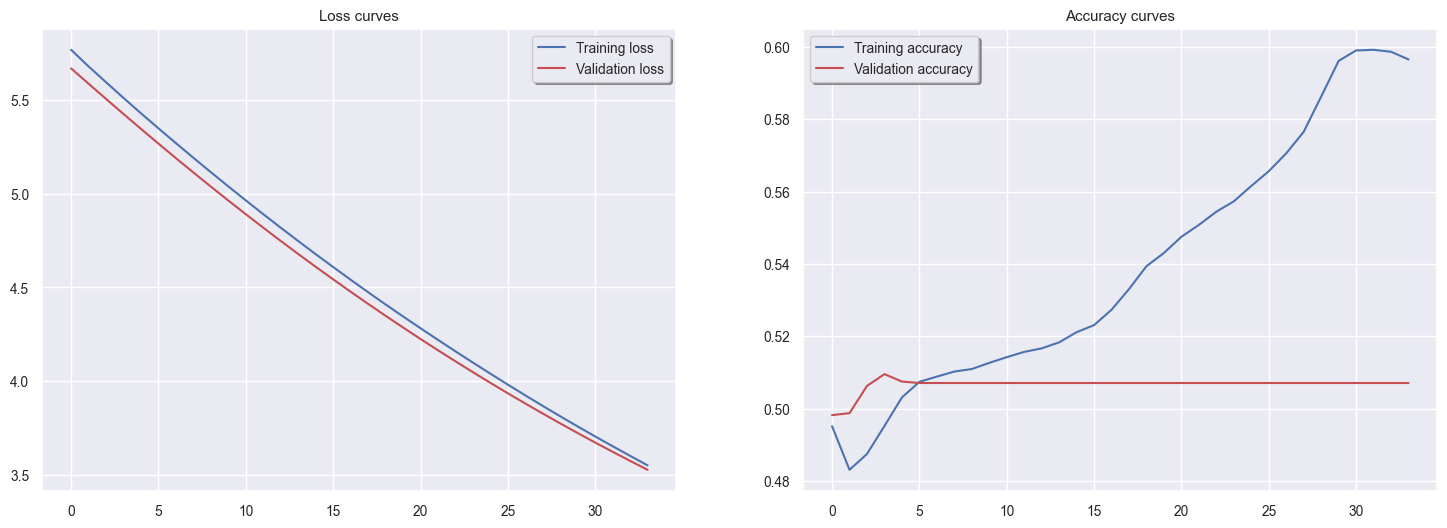

In [242]:
# Let's make a list of CONSTANTS for modelling:
LAYERS = [64, 16, 4, 1]                # number of units in hidden and output layers
M_TRAIN = X_train.shape[0]           # number of training examples (2D)
M_TEST = X_test.shape[0]             # number of test examples (2D),full=X_test.shape[0]
N = X_train.shape[2]                 # number of features
BATCH = M_TRAIN                          # batch size
EPOCH = 50                           # number of epochs
LR = 5e-2                            # learning rate of the gradient descent
LAMBD = 3e-2                         # lambda in L2 regularizaion
DP = 0.0                             # dropout rate
RDP = 0.0                            # recurrent dropout rate
print(f'layers={LAYERS}, train_examples={M_TRAIN}, test_examples={M_TEST}')
print(f'batch = {BATCH}, timesteps = {T}, features = {N}, epochs = {EPOCH}')
print(f'lr = {LR}, lambda = {LAMBD}, dropout = {DP}, recurr_dropout = {RDP}')

# Build the Model
model = Sequential()
model.add(LSTM(input_shape=(T, N), units=LAYERS[0],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=True, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())
model.add(LSTM(units=LAYERS[1],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=True, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())
model.add(LSTM(units=LAYERS[2],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=False, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())
model.add(Dense(units=LAYERS[3], activation='sigmoid'))

# Compile the model with Adam optimizer
model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer=Adam(lr=LR))
print(model.summary())

# Define a learning rate decay method:
lr_decay = ReduceLROnPlateau(monitor='loss', 
                             patience=1, verbose=0, 
                             factor=0.5, min_lr=1e-8)
# Define Early Stopping:
early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, 
                           patience=30, verbose=1, mode='auto',
                           baseline=0, restore_best_weights=True)
# Train the model. 
# The dataset is small for NN - let's use test_data for validation
start = time()
History = model.fit(X_train, y_train,
                    epochs=EPOCH,
                    batch_size=BATCH,
                    validation_split=0.0,
                    validation_data=(X_test[:M_TEST], y_test[:M_TEST]),
                    shuffle=True,verbose=1,
                    callbacks=[lr_decay, early_stop])
print('-'*65)
print(f'Training was completed in {time() - start:.2f} secs')
print('-'*65)
# Evaluate the model:
train_loss, train_acc = model.evaluate(X_train, y_train,
                                       batch_size=M_TRAIN, verbose=0)
test_loss, test_acc = model.evaluate(X_test[:M_TEST], y_test[:M_TEST],
                                     batch_size=M_TEST, verbose=0)
print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')
print(f'test error = {round((1 - test_acc) * M_TEST)} out of {M_TEST} examples')

# WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr

# Plot the loss and accuracy curves over epochs:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
axs[0].plot(History.history['loss'], color='b', label='Training loss')
axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)
axs[1].plot(History.history['accuracy'], color='b', label='Training accuracy')
axs[1].plot(History.history['val_accuracy'], color='r', label='Validation accuracy')
axs[1].set_title("Accuracy curves")
axs[1].legend(loc='best', shadow=True)
plt.show()

Итак, 
* на вход нейросети - pr_change, put_vol_b, imbalance_vol
* на выход нейросети - d_close

Внимание!!! venv для этого файла Jupyter Notebook должен содержать установленную библиотеку tensorflow